In [9]:
### CLINICAL AND HISTOPATHOLOGICAL FEATURES ANALYSIS ###############
# Import libraries to work with dataframes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path='/home/vant/TFM/Final_db/Samples_alltypedata_annotated.xlsx'
df_complete=pd.read_excel(path)
print(df_complete.head())

                                             ID_CNIO  \
0                       Unique CNIO tumor identifier   
1  LP: ID for samples from La Paz Hospital; OVE: ...   
2                                                LP1   
3                                                LP2   
4                                                LP3   

                                         ID_ORIGINAL  \
0  Unique identifier from the hospital to the pat...   
1                                     Pathology code   
2                                           02B28662   
3                                           08B18876   
4                                            08B260A   

                               ID_ORIGINAL_NHC_BBANK  \
0  Unique identifier from Hospital (LP, OVE, MDA ...   
1  Unique alphanumeric code from the hospital or ...   
2                                                NaN   
3                                                NaN   
4                                             

In [10]:
# I only want to work with the dataframe that doesn't include the information lines (description + coding lines
# with indexes 0 and 1)
df=df_complete.drop([0,1])
print(df.head())

  ID_CNIO ID_ORIGINAL ID_ORIGINAL_NHC_BBANK HISTOLOGY HISTOLOGY_DETAIL AGE  \
2     LP1    02B28662                   NaN         0         No mixed  50   
3     LP2    08B18876                   NaN         0         No mixed  42   
4     LP3     08B260A                   NaN         0         No mixed  68   
5     LP4    11B18858                   NaN         0         No mixed  50   
6     LP5     99B6752                   NaN         0         No mixed  82   

  GRADE FIGO FIGOL FIGOa  ... Non-MMRd_mutation TILs_score_info  \
2     2    3     0     1  ...                NO             YES   
3     2    3     0     1  ...                NO             YES   
4     2    5     0     2  ...                NO             YES   
5     1    6     0     2  ...                NO             YES   
6     1    1     0     1  ...                NO             YES   

  TILs_CNIO_info TILs_ep_CNIO TILs_ep_LP TILs_ep_OTTA TILs_tu_CNIO TILs_tu_LP  \
2   YES_complete            1          9       

In [11]:
# Check column names and characteristics of their values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 2 to 168
Data columns (total 56 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID_CNIO                    167 non-null    object
 1   ID_ORIGINAL                163 non-null    object
 2   ID_ORIGINAL_NHC_BBANK      147 non-null    object
 3   HISTOLOGY                  167 non-null    object
 4   HISTOLOGY_DETAIL           167 non-null    object
 5   AGE                        167 non-null    object
 6   GRADE                      132 non-null    object
 7   FIGO                       161 non-null    object
 8   FIGOL                      161 non-null    object
 9   FIGOa                      161 non-null    object
 10  NEOADJUVANT_TREATMENT      111 non-null    object
 11  ADJUVANT_TREATMENT         152 non-null    object
 12  TYPE_ADJUVANT              121 non-null    object
 13  OTHER_ADJ_TREAT            7 non-null      object
 14  RESIDUAL  

In [12]:
########Firstly we change misclassified samples to redo the analysis  #######################

# Change the values to 'MMRp' for samples 'LP20', 'LP26', and 'MDA15'
# We use .loc[] to access specific rows where 'ID_CNIO' matches one of the specified samples
df.loc[df['ID_CNIO'].isin(['LP20', 'LP26', 'MDA15']), 'MMR_final_status'] = 'MMRp'

# Change the values to 'MMRd' for sample 'MDA26'
df.loc[df['ID_CNIO'].isin(['MDA26']), 'MMR_final_status'] = 'MMRd'

# Eliminate mixed case
df=df[df['ID_CNIO']!='RVB3']

# Display the modified DataFrame to verify the changes
# Only showing 'ID_CNIO' and 'MMR_final_status' columns for brevity
print(df[['ID_CNIO', 'MMR_final_status']].head(30))

   ID_CNIO MMR_final_status
2      LP1             MMRp
3      LP2             MMRp
4      LP3             MMRp
5      LP4             MMRp
6      LP5             MMRp
7      LP8             MMRp
8      LP9             MMRp
9     LP11             MMRp
10    LP12             MMRp
11    LP13             MMRp
12    LP14             MMRp
13    LP15             MMRp
14    LP16             MMRd
15    LP17             MMRd
16    LP18             MMRd
17    LP20             MMRp
18    LP21             MMRd
19    LP22             MMRd
20    LP24             MMRp
21    LP26             MMRp
22    LP27             MMRp
23    LP28             MMRp
24    LP29             MMRp
25    LP30             MMRd
26    LP31             MMRp
27    LP32             MMRp
28    LP33             MMRp
29    LP36             MMRp
30    LP37             MMRd
31    LP38             MMRp


Absolute frequencies dataframe is:
 GRADE      Well differentiated  Moderately differentiated  \
HISTOLOGY                                                   
0                           46                         27   
1                            6                         10   

GRADE      Poorly differentiated  Unknown  
HISTOLOGY                                  
0                             10        6  
1                             33       28  
Percentages dataframe is:
 GRADE      Well differentiated  Moderately differentiated  \
HISTOLOGY                                                   
0                    51.685393                  30.337079   
1                     7.792208                  12.987013   

GRADE      Poorly differentiated    Unknown  
HISTOLOGY                                    
0                      11.235955   6.741573  
1                      42.857143  36.363636  


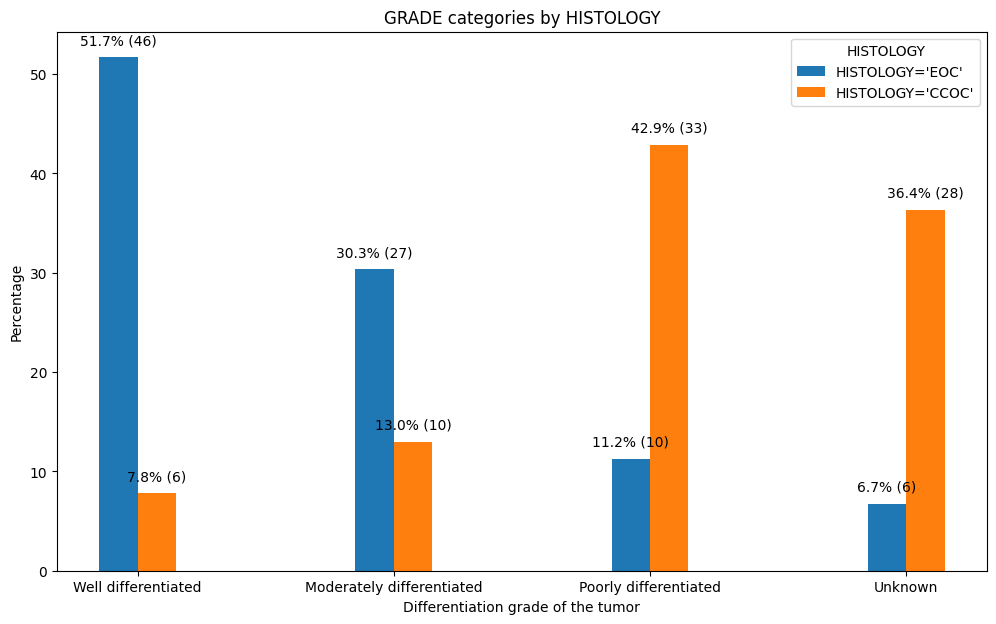

In [13]:
### BAR PLOTS AND FREQUENCY TABLE BY GRADE AND HISTOLOGY ##########
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Map GRADE values to descriptive categories. HISTOLOGY=0 refers to EOC and HISTOLOGY=1 refers to CCOC
grade_mapping = {1: 'Well differentiated', 2: 'Moderately differentiated', 3: 'Poorly differentiated'}
df['GRADE'] = df['GRADE'].map(grade_mapping).fillna('Unknown')

# Step 2: Count the frequencies of each GRADE category within each HISTOLOGY category
# unstack reorganizes the data in a table format and fill_value=0 fills with 0 if there are not any case in some category
frequencies_abs = df.groupby('HISTOLOGY')['GRADE'].value_counts().unstack(fill_value=0)  # Absolute frequencies
frequencies_pct = df.groupby('HISTOLOGY')['GRADE'].value_counts(normalize=True).unstack(fill_value=0) * 100  # Relative frequencies

# Step 3: Sort columns in the DataFrame based on the desired order of GRADE categories
order = ['Well differentiated', 'Moderately differentiated', 'Poorly differentiated', 'Unknown']
frequencies_abs = frequencies_abs.reindex(columns=order)
frequencies_pct = frequencies_pct.reindex(columns=order)

# Display the tables with absolute numbers and percentages
print("Absolute frequencies dataframe is:\n", frequencies_abs)
print("Percentages dataframe is:\n", frequencies_pct)

# Define the mapping for HISTOLOGY labels
histology_mapping = {0: 'EOC', 1: 'CCOC'}

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 7))  # Create a figure with a specified size
bar_width = 0.15  # Width of each bar in the grouped bar chart
indices = range(len(frequencies_abs.columns))  # Base positions for each GRADE category

# Loop through each HISTOLOGY category to create bars
for i, histology in enumerate(frequencies_abs.index):
    # Calculate the positions for the bars of the current HISTOLOGY
    positions = [index + i * bar_width for index in indices]
    
    # Plot the bars for the current HISTOLOGY
    ax.bar(positions, frequencies_pct.loc[histology], width=bar_width, label=f"HISTOLOGY='{histology_mapping[histology]}'")
    
    # Add labels showing percentage and absolute counts
    for pos, grade in zip(positions, frequencies_abs.columns):
        pct = frequencies_pct.loc[histology, grade]  # Percentage value
        count = frequencies_abs.loc[histology, grade]  # Absolute count value
        # Place a text label above each bar
        ax.text(pos, pct + 1, f'{pct:.1f}% ({count})', ha='center', va='bottom')

# Customize the chart
ax.set_title('GRADE categories by HISTOLOGY')  # Title of the chart
ax.set_xlabel('Differentiation grade of the tumor')  # Label for the x-axis
ax.set_ylabel('Percentage')  # Label for the y-axis

# Set custom positions for the x-axis ticks and their labels
ax.set_xticks([index + (len(frequencies_abs.index) - 1) * bar_width / 2 for index in indices])
ax.set_xticklabels(frequencies_abs.columns)  # Set labels for the x-axis ticks

# Add a legend to explain the HISTOLOGY categories
ax.legend(title='HISTOLOGY')

# Display the chart
plt.show()

In [14]:
## Check unique categories in 'VITAL STATUS' column
categorias = df['VITAL STATUS'].unique()
print(categorias)

['0' '1' nan]


Absolute frequencies dataframe is:
 VITAL STATUS  Alive  Dead  Unknown
HISTOLOGY                         
0                66    20        3
1                48    24        5
Percentages dataframe is:
 VITAL STATUS      Alive       Dead   Unknown
HISTOLOGY                                   
0             74.157303  22.471910  3.370787
1             62.337662  31.168831  6.493506


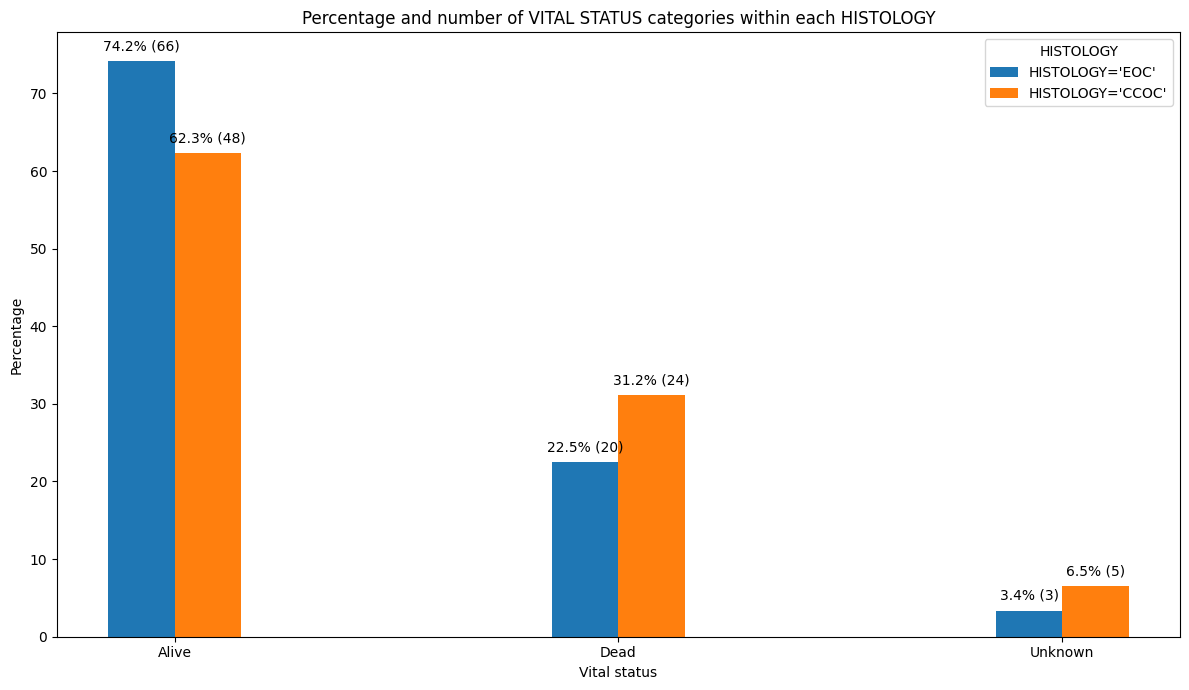

In [15]:
### BAR PLOTS AND FREQUENCY TABLE BY VITAL STATUS AND HISTOLOGY ##########
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Map 'VITAL STATUS' values to descriptive categories
df['VITAL STATUS']=df['VITAL STATUS'].astype(str)
map_vital = {'0': 'Alive', '1': 'Dead'}
df['VITAL STATUS'] = df['VITAL STATUS'].map(map_vital).fillna('Unknown')

# Count frequencies
frequencies_abs = df.groupby('HISTOLOGY')['VITAL STATUS'].value_counts().unstack(fill_value=0)  # Absolute
frequencies_pct = df.groupby('HISTOLOGY')['VITAL STATUS'].value_counts(normalize=True).unstack(fill_value=0) * 100  # Percentages

# Show tables
print("Absolute frequencies dataframe is:\n", frequencies_abs)
print("Percentages dataframe is:\n", frequencies_pct)

# Graphic
fig, ax = plt.subplots(figsize=(12, 7))

bar_width = 0.15
indices = range(len(frequencies_abs.columns))  

# Create bars for each HISTOLOGY category
for i, histology in enumerate(frequencies_abs.index):
    ax.bar([index + i * bar_width for index in indices], 
           frequencies_pct.loc[histology], 
           width=bar_width, 
           label=f"HISTOLOGY='{histology_mapping[histology]}'")

# Add labels
for i, histology in enumerate(frequencies_abs.index):
    for index, vital_status in enumerate(frequencies_abs.columns):
        label = f'{frequencies_pct.loc[histology, vital_status]:.1f}% ({frequencies_abs.loc[histology, vital_status]})'
        ax.text(index + i * bar_width, 
                frequencies_pct.loc[histology, vital_status] + 1, 
                label, 
                ha='center', va='bottom')

ax.set_title('Percentage and number of VITAL STATUS categories within each HISTOLOGY')
ax.set_xlabel('Vital status')
ax.set_ylabel('Percentage')

ax.set_xticks([index + (len(frequencies_abs.index) - 1) * bar_width / 2 for index in indices])
ax.set_xticklabels(frequencies_abs.columns)
ax.legend(title='HISTOLOGY')

plt.xticks(rotation=0)

# Show
plt.tight_layout()
plt.show()

Absolute frequencies dataframe is:
 FIGOa       1   2   3   4  nan
HISTOLOGY                     
0          62  12  10   4    1
1          36   7  20  10    4
Percentages dataframe is:
 FIGOa              1          2          3          4       nan
HISTOLOGY                                                      
0          69.662921  13.483146  11.235955   4.494382  1.123596
1          46.753247   9.090909  25.974026  12.987013  5.194805


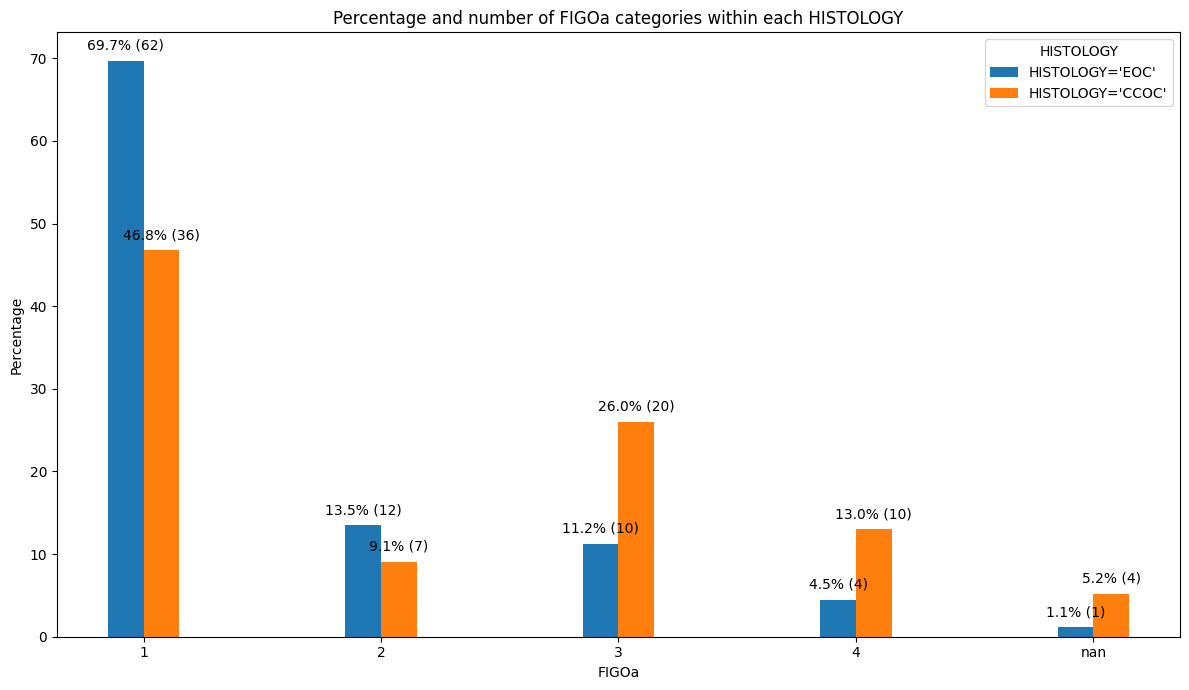

In [16]:
### BAR PLOTS AND FREQUENCY TABLE  BY FIGO STAGE AND HISTOLOGY ##########
import pandas as pd
import matplotlib.pyplot as plt

df['FIGOa']=df['FIGOa'].astype(str)

# Calculate frequencies in each group
frequencies_abs = df.groupby('HISTOLOGY')['FIGOa'].value_counts().unstack(fill_value=0)  # Absolute
frequencies_pct = df.groupby('HISTOLOGY')['FIGOa'].value_counts(normalize=True).unstack(fill_value=0) * 100  # Percentages

df['FIGOa'] = df['FIGOa'].fillna('Unknown')

# Show tables
print("Absolute frequencies dataframe is:\n", frequencies_abs)
print("Percentages dataframe is:\n", frequencies_pct)

# Graphic
fig, ax = plt.subplots(figsize=(12, 7))

bar_width = 0.15
indices = range(len(frequencies_abs.columns))  # Represent categories of FIGOa

# Create bars for every category of HISTOLOGY
for i, histology in enumerate(frequencies_abs.index):
    ax.bar([index + i * bar_width for index in indices], 
           frequencies_pct.loc[histology],  
           width=bar_width, 
           label=f"HISTOLOGY='{histology_mapping[histology]}'")

# Add labels
for i, histology in enumerate(frequencies_abs.index):
    for index, vital_status in enumerate(frequencies_abs.columns):
        # Label with absolute percentage
        label = f'{frequencies_pct.loc[histology, vital_status]:.1f}% ({frequencies_abs.loc[histology, vital_status]})'
        ax.text(index + i * bar_width, 
                frequencies_pct.loc[histology, vital_status] + 1,  
                label, 
                ha='center', va='bottom')

ax.set_title('Percentage and number of FIGOa categories within each HISTOLOGY')
ax.set_xlabel('FIGOa')
ax.set_ylabel('Percentage')

ax.set_xticks([index + (len(frequencies_abs.index) - 1) * bar_width / 2 for index in indices])
ax.set_xticklabels(frequencies_abs.columns)
ax.legend(title='HISTOLOGY')

plt.xticks(rotation=0)

# Show
plt.tight_layout()
plt.show()

Absolute frequencies dataframe is:
 FIGOL       0   1  nan
HISTOLOGY             
0          74  14    1
1          43  30    4
Percentages dataframe is:
 FIGOL              0          1       nan
HISTOLOGY                                
0          83.146067  15.730337  1.123596
1          55.844156  38.961039  5.194805


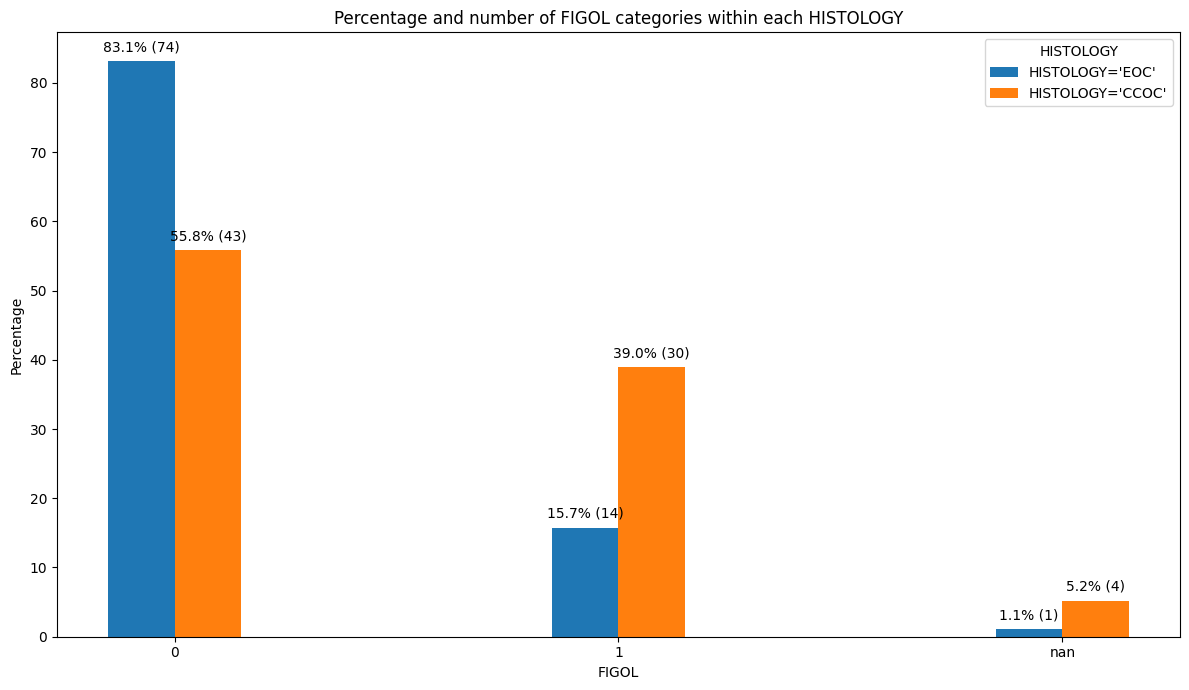

In [17]:
### BAR PLOTS AND FREQUENCY TABLE BY FIGO STAGE GROUPED (FIGOL COLUMN) AND HISTOLOGY ##########
import pandas as pd
import matplotlib.pyplot as plt

df['FIGOL']=df['FIGOL'].astype(str)

# Calculate frequencies in each group
frequencies_abs = df.groupby('HISTOLOGY')['FIGOL'].value_counts().unstack(fill_value=0)  # Frecuencia absoluta
frequencies_pct = df.groupby('HISTOLOGY')['FIGOL'].value_counts(normalize=True).unstack(fill_value=0) * 100  # Convertir a porcentaje

df['FIGOL'] = df['FIGOL'].fillna('Unknown')

# Show tables
print("Absolute frequencies dataframe is:\n", frequencies_abs)
print("Percentages dataframe is:\n", frequencies_pct)

# Graphic
fig, ax = plt.subplots(figsize=(12, 7))

bar_width = 0.15
indices = range(len(frequencies_abs.columns))  

# Create bars for HISTOLOGY categories
for i, histology in enumerate(frequencies_abs.index):
    ax.bar([index + i * bar_width for index in indices], 
           frequencies_pct.loc[histology], 
           width=bar_width, 
           label=f"HISTOLOGY='{histology_mapping[histology]}'")

# Add labels and number of cases
for i, histology in enumerate(frequencies_abs.index):
    for index, vital_status in enumerate(frequencies_abs.columns):
        # Etiqueta con el formato: porcentaje (número absoluto)
        label = f'{frequencies_pct.loc[histology, vital_status]:.1f}% ({frequencies_abs.loc[histology, vital_status]})'
        ax.text(index + i * bar_width, 
                frequencies_pct.loc[histology, vital_status] + 1, 
                label, 
                ha='center', va='bottom')

ax.set_title('Percentage and number of FIGOL categories within each HISTOLOGY')
ax.set_xlabel('FIGOL')
ax.set_ylabel('Percentage')

ax.set_xticks([index + (len(frequencies_abs.index) - 1) * bar_width / 2 for index in indices])
ax.set_xticklabels(frequencies_abs.columns)
ax.legend(title='HISTOLOGY')

plt.xticks(rotation=0)

# Show
plt.tight_layout()
plt.show()

Absolute frequencies dataframe is:
 RESIDUALa  No  Unknown  Yes
HISTOLOGY                  
0          69       15    5
1          42       19   16
Percentages dataframe is:
 RESIDUALa         No    Unknown        Yes
HISTOLOGY                                 
0          77.528090  16.853933   5.617978
1          54.545455  24.675325  20.779221


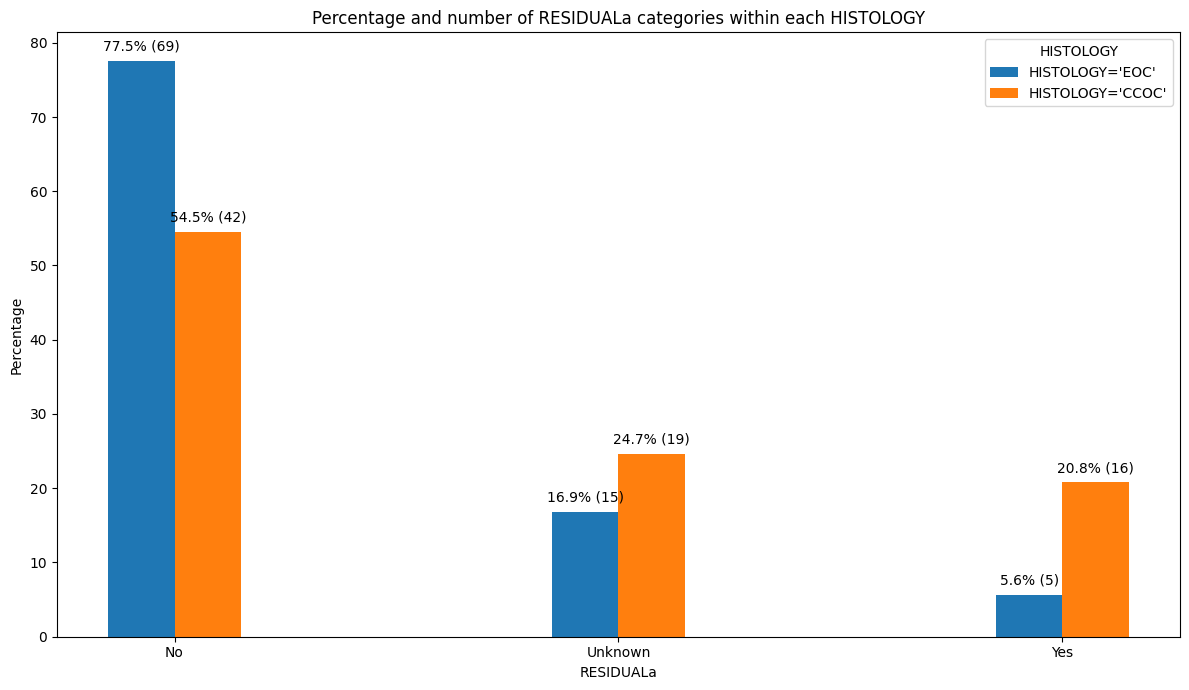

In [18]:
### BAR PLOTS AND FREQUENCY TABLE BY RESIDUAL DISEASE AND HISTOLOGY ##########
import pandas as pd
import matplotlib.pyplot as plt

df['RESIDUALa']=df['RESIDUALa'].astype(str)
map_residual = {'0': 'No', '1': 'Yes'}
df['RESIDUALa'] = df['RESIDUALa'].map(map_residual).fillna('Unknown')
# Frequencies 
frequencies_abs = df.groupby('HISTOLOGY')['RESIDUALa'].value_counts().unstack(fill_value=0)  
frequencies_pct = df.groupby('HISTOLOGY')['RESIDUALa'].value_counts(normalize=True).unstack(fill_value=0) * 100 

df['RESIDUALa'] = df['RESIDUALa'].fillna('Unknown')

# Show tables
print("Absolute frequencies dataframe is:\n", frequencies_abs)
print("Percentages dataframe is:\n", frequencies_pct)

# Graphic
fig, ax = plt.subplots(figsize=(12, 7))

bar_width = 0.15
indices = range(len(frequencies_abs.columns)) 

# Create bars for every HISTOLOGY category
for i, histology in enumerate(frequencies_abs.index):
    ax.bar([index + i * bar_width for index in indices], 
           frequencies_pct.loc[histology], 
           width=bar_width, 
           label=f"HISTOLOGY='{histology_mapping[histology]}'")

# Add labels of percentages and number of cases
for i, histology in enumerate(frequencies_abs.index):
    for index, vital_status in enumerate(frequencies_abs.columns):
        label = f'{frequencies_pct.loc[histology, vital_status]:.1f}% ({frequencies_abs.loc[histology, vital_status]})'
        ax.text(index + i * bar_width, 
                frequencies_pct.loc[histology, vital_status] + 1,
                label, 
                ha='center', va='bottom')

ax.set_title('Percentage and number of RESIDUALa categories within each HISTOLOGY')
ax.set_xlabel('RESIDUALa')
ax.set_ylabel('Percentage')

ax.set_xticks([index + (len(frequencies_abs.index) - 1) * bar_width / 2 for index in indices])
ax.set_xticklabels(frequencies_abs.columns)
ax.legend(title='HISTOLOGY')

plt.xticks(rotation=0)

# Show
plt.tight_layout()
plt.show()

Absolute frequencies dataframe is:
 MMR_final_status  MMRd  MMRp
HISTOLOGY                   
0                   12    77
1                    5    72


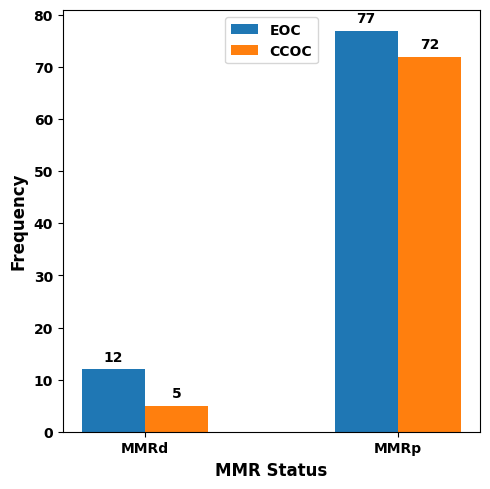

In [96]:
### BAR PLOTS AND FREQUENCY TABLE BY MMR STATUS AND HISTOLOGY ##########
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the column is a string
df['MMR_final_status'] = df['MMR_final_status'].astype(str)

# Frequencies
frequencies_abs = df.groupby('HISTOLOGY')['MMR_final_status'].value_counts().unstack(fill_value=0)  # Absolute frequency

df['MMR_final_status'] = df['MMR_final_status'].fillna('Unknown')

# Show tables
print("Absolute frequencies dataframe is:\n", frequencies_abs)

# Graphic
fig, ax = plt.subplots(figsize=(5, 5))

# Adjust bar width and spacing
bar_width = 0.25  # Reduced bar width for compactness
indices = range(len(frequencies_abs.columns))

# Create bars for every HISTOLOGY category
for i, histology in enumerate(frequencies_abs.index):
    bar_positions = [index + i * bar_width for index in indices]
    bars = ax.bar(bar_positions, 
                  frequencies_abs.loc[histology],  # Plot absolute frequencies
                  width=bar_width, 
                  label=f"{histology_mapping[histology]}")

    # Add absolute frequency above bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, 
                height + 1,  # Position above the bar
                f'{int(height)}',  # Convert to integer to avoid decimals
                ha='center', va='bottom', fontsize=10, weight='bold')

# Set labels, and make them bold
ax.set_xlabel('MMR Status', fontsize=12, weight='bold')
ax.set_ylabel('Frequency', fontsize=12, weight='bold')

# Bold x and y ticks
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')

# Set x-ticks and labels
ax.set_xticks([index + (len(frequencies_abs.index) - 1) * bar_width / 2 for index in indices])
ax.set_xticklabels(frequencies_abs.columns, fontweight='bold')

# Add legend and make it bold
ax.legend(fontsize='11', prop={'weight': 'bold'}, loc='upper center', bbox_to_anchor=(0.5, 1))

plt.xticks(rotation=0)

# Show
plt.tight_layout()
plt.show()


Absolute frequencies dataframe is:
 MMR_final_status  MMRd  MMRp
HISTOLOGY                   
0                   12    77
1                    5    72
Percentages dataframe is:
 MMR_final_status       MMRd       MMRp
HISTOLOGY                             
0                 13.483146  86.516854
1                  6.493506  93.506494


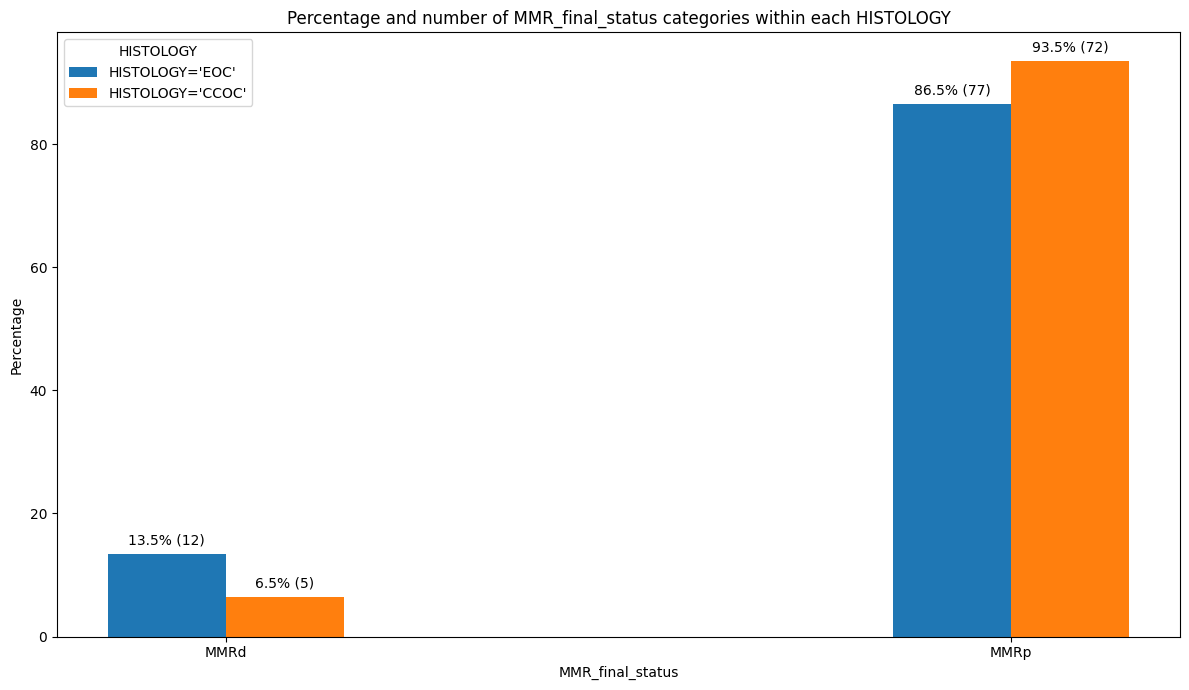

In [167]:
### BAR PLOTS AND FREQUENCY TABLE BY MMR STATUS AND HISTOLOGY ##########
import pandas as pd
import matplotlib.pyplot as plt

df['MMR_final_status']=df['MMR_final_status'].astype(str)
# Frequencies
frequencies_abs = df.groupby('HISTOLOGY')['MMR_final_status'].value_counts().unstack(fill_value=0)  # Frecuencia absoluta
frequencies_pct = df.groupby('HISTOLOGY')['MMR_final_status'].value_counts(normalize=True).unstack(fill_value=0) * 100  # Convertir a porcentaje

df['MMR_final_status'] = df['MMR_final_status'].fillna('Unknown')

#  Show tables
print("Absolute frequencies dataframe is:\n", frequencies_abs)
print("Percentages dataframe is:\n", frequencies_pct)

# Graphic
fig, ax = plt.subplots(figsize=(12, 7))

bar_width = 0.15
indices = range(len(frequencies_abs.columns)) 

# Create bars for every HISTOLOGY category
for i, histology in enumerate(frequencies_abs.index):
    ax.bar([index + i * bar_width for index in indices], 
           frequencies_pct.loc[histology],  # Graficamos porcentajes
           width=bar_width, 
           label=f"HISTOLOGY='{histology_mapping[histology]}'")

# Add labels with percentages and number of cases
for i, histology in enumerate(frequencies_abs.index):
    for index, mmr in enumerate(frequencies_abs.columns):
        label = f'{frequencies_pct.loc[histology, mmr]:.1f}% ({frequencies_abs.loc[histology, mmr]})'
        ax.text(index + i * bar_width, 
                frequencies_pct.loc[histology, mmr] + 1,  
                label, 
                ha='center', va='bottom')

ax.set_title('Percentage and number of MMR_final_status categories within each HISTOLOGY')
ax.set_xlabel('MMR_final_status')
ax.set_ylabel('Percentage')

ax.set_xticks([index + (len(frequencies_abs.index) - 1) * bar_width / 2 for index in indices])
ax.set_xticklabels(frequencies_abs.columns)
ax.legend(title='HISTOLOGY')

plt.xticks(rotation=0)

# Show
plt.tight_layout()
plt.show()

Absolute frequencies dataframe is:
 TILs_ep_CNIO   0   1   2   3  Unknown
HISTOLOGY                            
0             16  25  28  15        5
1             20  19  21  12        5
Percentages dataframe is:
 TILs_ep_CNIO          0          1          2          3   Unknown
HISTOLOGY                                                         
0             17.977528  28.089888  31.460674  16.853933  5.617978
1             25.974026  24.675325  27.272727  15.584416  6.493506


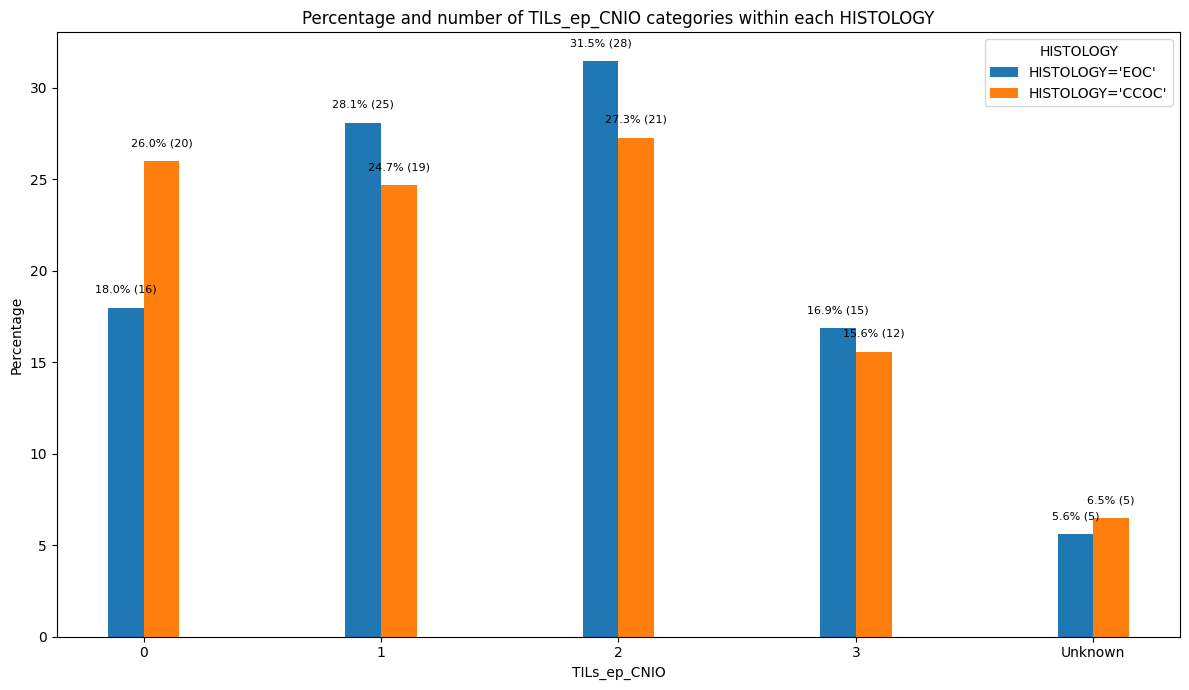

In [19]:
### BAR PLOTS AND FREQUENCY TABLE BY TILs_ep_CNIO AND HISTOLOGY ########## 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Replace values in 'TILs_ep_CNIO' where the value is 9 or NaN with 'Unknown' (NEW CATEGORY)
df['TILs_ep_CNIO'] = df['TILs_ep_CNIO'].replace(9, 'Unknown').fillna('Unknown').astype(str)

# Step 2: Count absolute frequencies of each TILs_ep_CNIO category within each HISTOLOGY
frequencies_abs = df.groupby('HISTOLOGY')['TILs_ep_CNIO'].value_counts().unstack(fill_value=0)
# Calculate frequencies in percentages
frequencies_pct = df.groupby('HISTOLOGY')['TILs_ep_CNIO'].value_counts(normalize=True).unstack(fill_value=0) * 100  

# Display tables
print("Absolute frequencies dataframe is:\n", frequencies_abs)
print("Percentages dataframe is:\n", frequencies_pct)

# Step 3: Set up the bar plot
fig, ax = plt.subplots(figsize=(12, 7))

bar_width = 0.15
indices = range(len(frequencies_abs.columns))  # Categories of TILs_ep_CNIO

# Create bars for each HISTOLOGY category
for i, histology in enumerate(frequencies_abs.index):
    ax.bar([index + i * bar_width for index in indices], 
           frequencies_pct.loc[histology],  # Plot percentages
           width=bar_width, 
           label=f"HISTOLOGY='{histology_mapping[histology]}'")

# Step 4: Add percentage and absolute count labels on top of each bar
for i, histology in enumerate(frequencies_abs.index):
    for index, status in enumerate(frequencies_abs.columns):
        # Label format: percentage (absolute count)
        label = f'{frequencies_pct.loc[histology, status]:.1f}% ({frequencies_abs.loc[histology, status]})'
        ax.text(index + i * bar_width, 
                frequencies_pct.loc[histology, status] + 0.7,  # Offset label slightly above the bar
                label, 
                ha='center', va='bottom', fontsize=8)

# Set titles and labels
ax.set_title('Percentage and number of TILs_ep_CNIO categories within each HISTOLOGY')
ax.set_xlabel('TILs_ep_CNIO')
ax.set_ylabel('Percentage')

# Set x-axis ticks and labels
ax.set_xticks([index + (len(frequencies_abs.index) - 1) * bar_width / 2 for index in indices])
ax.set_xticklabels(frequencies_abs.columns)
ax.legend(title='HISTOLOGY')

plt.xticks(rotation=0)

plt.tight_layout()

# Display the plot
plt.show()

Absolute frequencies dataframe is:
 TILs_tu_CNIO  0   1   2   3  Unknown
HISTOLOGY                           
0             1  10  40  33        5
1             4  15  27  27        4
Percentages dataframe is:
 TILs_tu_CNIO         0          1          2          3   Unknown
HISTOLOGY                                                        
0             1.123596  11.235955  44.943820  37.078652  5.617978
1             5.194805  19.480519  35.064935  35.064935  5.194805


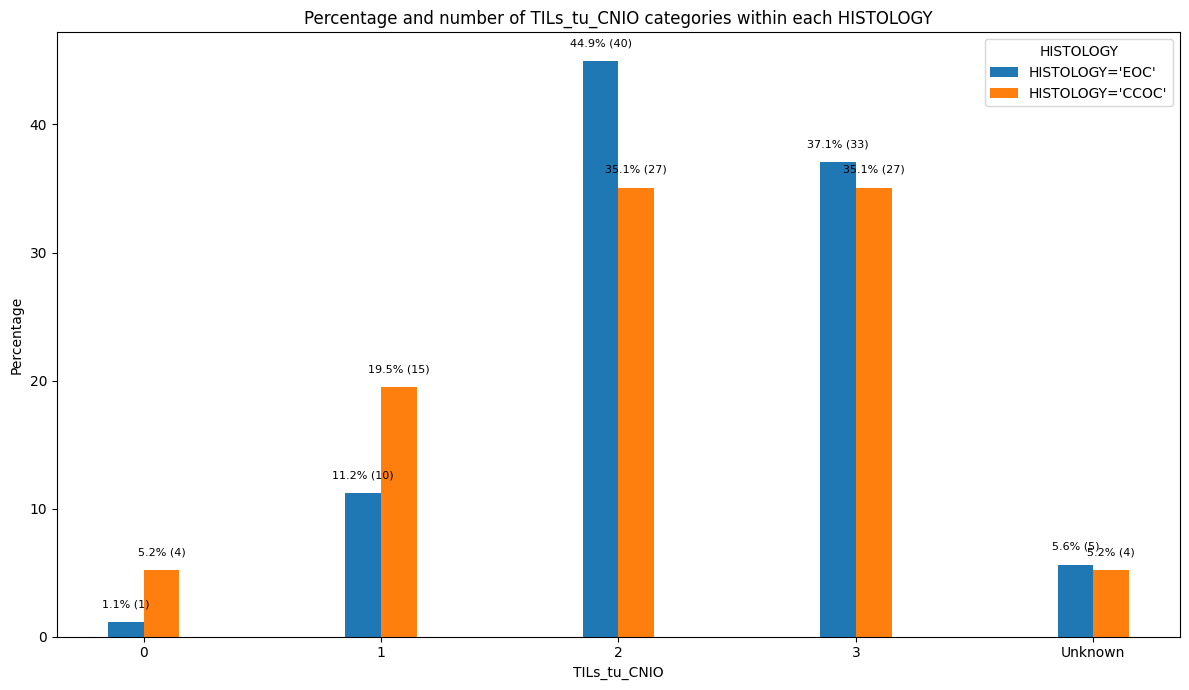

In [20]:
### BAR PLOTS AND FREQUENCY TABLE BY TILs_tu_CNIO AND HISTOLOGY ########## 

# Step 1: Replace values in 'TILs_tu_CNIO' where the value is 9 or NaN with 'Unknown'
df['TILs_tu_CNIO'] = df['TILs_tu_CNIO'].replace(9, 'Unknown').fillna('Unknown').astype(str)

# Step 2: Count absolute frequencies of each TILs_tu_CNIO category within each HISTOLOGY
frequencies_abs = df.groupby('HISTOLOGY')['TILs_tu_CNIO'].value_counts().unstack(fill_value=0)
# Calculate frequencies in percentages
frequencies_pct = df.groupby('HISTOLOGY')['TILs_tu_CNIO'].value_counts(normalize=True).unstack(fill_value=0) * 100  

# Display tables
print("Absolute frequencies dataframe is:\n", frequencies_abs)
print("Percentages dataframe is:\n", frequencies_pct)

# Step 3: Set up the bar plot
fig, ax = plt.subplots(figsize=(12, 7))

bar_width = 0.15
indices = range(len(frequencies_abs.columns))  # Categories of TILs_tu_CNIO

# Create bars for each HISTOLOGY category
for i, histology in enumerate(frequencies_abs.index):
    ax.bar([index + i * bar_width for index in indices], 
           frequencies_pct.loc[histology],  # Plot percentages
           width=bar_width, 
           label=f"HISTOLOGY='{histology_mapping[histology]}'")

# Step 4: Add percentage and absolute count labels on top of each bar
for i, histology in enumerate(frequencies_abs.index):
    for index, status in enumerate(frequencies_abs.columns):
        # Label format: percentage (absolute count)
        label = f'{frequencies_pct.loc[histology, status]:.1f}% ({frequencies_abs.loc[histology, status]})'
        ax.text(index + i * bar_width, 
                frequencies_pct.loc[histology, status] + 1,  # Offset label slightly above the bar
                label, 
                ha='center', va='bottom', fontsize=8)

# Set titles and labels
ax.set_title('Percentage and number of TILs_tu_CNIO categories within each HISTOLOGY')
ax.set_xlabel('TILs_tu_CNIO')
ax.set_ylabel('Percentage')

# Set x-axis ticks and labels
ax.set_xticks([index + (len(frequencies_abs.index) - 1) * bar_width / 2 for index in indices])
ax.set_xticklabels(frequencies_abs.columns)
ax.legend(title='HISTOLOGY')

plt.xticks(rotation=0)

plt.tight_layout()

# Display the plot
plt.show()


In [21]:
### TILs RAW COUNTS STATISTICAL ANALYSIS #################
### CALCULATE MEAN AND SD, MEDIAN AND IQR IN TILs_raw_ep counts 

# Step 1: Filter rows where 'TILs_CNIO_info' is not 'NO'
df_filtered2 = df[df['TILs_CNIO_info'] != 'NO']

# Step 2: Handle missing values in 'TILs_raw_ep'
# Drop rows where 'TILs_raw_ep' is empty (NaN) to avoid errors in statistical calculations.One of the samples 'OVE77' only contains
# intratumoral counts
df_filtered2 = df_filtered2.dropna(subset=['TILs_raw_ep'])

# Step 3: Print the number of samples after filtering
print(f"Number of samples after filtering: {len(df_filtered2)}")

# Step 4: Group by 'HISTOLOGY' and compute statistics
statistics = df_filtered2.groupby('HISTOLOGY')['TILs_raw_ep'].agg(
    mean='mean',                       # Mean of the values
    std='std',                         # Standard deviation
    median='median',                   # Median of the values
    Q1=lambda x: x.quantile(0.25),     # First quartile (25th percentile)
    Q3=lambda x: x.quantile(0.75),     # Third quartile (75th percentile)
    iqr=lambda x: x.quantile(0.75) - x.quantile(0.25)  # Interquartile range
).reset_index()

# Step 5: Print the resulting DataFrame with statistics
print(statistics)

Number of samples after filtering: 156
   HISTOLOGY       mean       std median   Q1    Q3   iqr
0          0  12.178571  26.20961    3.0  1.0  9.25  8.25
1          1  13.861111  32.38775    2.0  0.0  7.50  7.50


In [22]:
### CALCULATE MEAN AND SD, MEDIAN AND IQR IN TILs_raw_tu COUNTS

# Step 1: Filter rows where 'TILs_CNIO_info' is not 'NO'
df_filtered3 = df[df['TILs_CNIO_info'] != 'NO']
# Step 2: Handle missing values in 'TILs_raw_tu'
# Drop rows where 'TILs_raw_tu' is empty (NaN) to avoid errors in statistical calculations
df_filtered3 = df_filtered3.dropna(subset=['TILs_raw_tu'])

# Step 3: Print the number of samples after filtering
print(f"Number of samples after filtering: {len(df_filtered3)}")

# Step 4: Group by 'HISTOLOGY' and compute statistics
statistics = df_filtered3.groupby('HISTOLOGY')['TILs_raw_tu'].agg(
    mean='mean',                       # Mean of the values
    std='std',                         # Standard deviation
    median='median',                   # Median of the values
    Q1=lambda x: x.quantile(0.25),     # First quartile (25th percentile)
    Q3=lambda x: x.quantile(0.75),     # Third quartile (75th percentile)
    iqr=lambda x: x.quantile(0.75) - x.quantile(0.25)  # Interquartile range
).reset_index()

# Step 5: Print the resulting DataFrame with statistics
print(statistics)


Number of samples after filtering: 157
   HISTOLOGY       mean        std median   Q1    Q3   iqr
0          0  32.440476  50.668626   13.0  5.0  32.0  27.0
1          1  47.739726  79.270638   11.0  2.0  59.0  57.0


In [23]:
### CALCULATE MEAN AND SD, MEDIAN AND IQR IN TILs_raw_ep and TILs_raw_tu COUNTS IN THE ENTIRE COHORT #########

# Function to calculate statistics for a given variable
def calculate_statistics(df, column_name):
    return {
        'N': df[column_name].count(),
        'mean': df[column_name].mean(),
        'std': df[column_name].std(),
        'median': df[column_name].median(),
        'Q1': df[column_name].quantile(0.25),
        'Q3': df[column_name].quantile(0.75),
        'iqr': df[column_name].quantile(0.75) - df[column_name].quantile(0.25)
    }

# Step 1: Filter rows where 'TILs_CNIO_info' is not 'NO'
df_filtered2 = df[df['TILs_CNIO_info'] != 'NO']

# Step 2: Calculate statistics for 'TILs_raw_ep', ignoring rows where it is NaN
statistics_ep = calculate_statistics(df_filtered2.dropna(subset=['TILs_raw_ep']), 'TILs_raw_ep')

# Step 3: Calculate statistics for 'TILs_raw_tu', ignoring rows where it is NaN
statistics_tu = calculate_statistics(df_filtered2.dropna(subset=['TILs_raw_tu']), 'TILs_raw_tu')

# Step 4: Print the statistics for both variables
print("Statistics for 'TILs_raw_ep':")
for key, value in statistics_ep.items():
    print(f"{key}: {value}")

print("\nStatistics for 'TILs_raw_tu':")
for key, value in statistics_tu.items():
    print(f"{key}: {value}")


Statistics for 'TILs_raw_ep':
N: 156
mean: 12.955128205128204
std: 29.138455457265923
median: 2.0
Q1: 1.0
Q3: 9.0
iqr: 8.0

Statistics for 'TILs_raw_tu':
N: 157
mean: 39.554140127388536
std: 65.76301615381479
median: 12.0
Q1: 4.0
Q3: 38.0
iqr: 34.0


In [24]:
### CALCULATE STATISTICS OF AGE ###########

# Step 1: Filter rows where 'AGE' is not empty
df_filtered_age = df[df['AGE'].notnull()]

# Step 2: Print the number of samples after filtering
print(f"Number of samples after filtering for AGE: {len(df_filtered_age)}")

# Step 3: Group by 'HISTOLOGY' and calculate statistics for 'AGE'
age_statistics_grouped = df_filtered_age.groupby('HISTOLOGY')['AGE'].agg(
    mean='mean',
    std='std',
    median='median',
    Q1=lambda x: x.quantile(0.25),  # First quartile (25th percentile)
    Q3=lambda x: x.quantile(0.75),  # Third quartile (75th percentile)
    iqr=lambda x: x.quantile(0.75) - x.quantile(0.25)  # Interquartile range
).reset_index()

# Step 4: Print the grouped statistics DataFrame
print("Statistics grouped by HISTOLOGY:")
print(age_statistics_grouped)

# Step 5: Calculate overall statistics for 'AGE' (without grouping) using the function previosly created
age_statistics_overall = calculate_statistics(df_filtered_age, 'AGE')

# Step 6: Print overall statistics
print("\nOverall statistics for AGE:")
for key, value in age_statistics_overall.items():
    print(f"{key}: {value}")
### Mean,median, Q1,Q3 and IQR of EOC+CCOC
print("Mean of age of all cohort",df_filtered_age['AGE'].mean())                    # Mean
print("Std of age of all cohort",df_filtered_age['AGE'].std())                     # Standard deviation
print("Median of age of all cohort",df_filtered_age['AGE'].median())                  # Median
print("Q1 of age of all cohort",df_filtered_age['AGE'].quantile(0.25))            # Q1
print("Q3 of age of all cohort",df_filtered_age['AGE'].quantile(0.75))            # Q3
print("IQR of age of all cohort",df_filtered_age['AGE'].quantile(0.75) - df_filtered_age['AGE'].quantile(0.25))            # IQR

Number of samples after filtering for AGE: 166
Statistics grouped by HISTOLOGY:
   HISTOLOGY       mean        std median    Q1    Q3   iqr
0          0  51.269663  11.594242   51.0  43.0  58.0  15.0
1          1  53.428571  11.553569   52.0  45.0  62.0  17.0

Overall statistics for AGE:
N: 166
mean: 52.2710843373494
std: 11.590696688559209
median: 51.0
Q1: 45.0
Q3: 60.0
iqr: 15.0
Mean of age of all cohort 52.2710843373494
Std of age of all cohort 11.590696688559209
Median of age of all cohort 51.0
Q1 of age of all cohort 45.0
Q3 of age of all cohort 60.0
IQR of age of all cohort 15.0


In [25]:
## CALCULATE % OF ENDOMETROID AND CLEAR CELL SAMPLES
histology_frequencies=df['HISTOLOGY'].value_counts()
total_samples=len(df)
print(total_samples)
histology_frequencies_per=(df['HISTOLOGY'].value_counts()/total_samples )*100

print("Histology frequencies:",histology_frequencies)
print("Histology frequencies percentages:",histology_frequencies_per)

166
Histology frequencies: HISTOLOGY
0    89
1    77
Name: count, dtype: int64
Histology frequencies percentages: HISTOLOGY
0    53.614458
1    46.385542
Name: count, dtype: float64


In [26]:
### SEE FORMAT OF NECESSARY COLUMNS TO DO SURVIVAL ANALYSIS ###########
print(df['VITAL STATUS'].head)
print(df['OS_CNIO'].head)

<bound method NDFrame.head of 2      Alive
3      Alive
4      Alive
5      Alive
6       Dead
       ...  
163    Alive
164    Alive
165     Dead
167    Alive
168    Alive
Name: VITAL STATUS, Length: 166, dtype: object>
<bound method NDFrame.head of 2      5568
3      5163
4      3047
5      3497
6      2534
       ... 
163     715
164     623
165    1572
167    4253
168      67
Name: OS_CNIO, Length: 166, dtype: object>


In [28]:
### ANALYZE 10 YEARS OS IN ALL COHORT ##########

from lifelines import KaplanMeierFitter

# Step 1: Filter rows with valid data in the required columns ('OS_CNIO', 'VITAL STATUS')
df_filtered4 = df.dropna(subset=['OS_CNIO', 'VITAL STATUS']).copy()

# Check the first few rows of 'OS_CNIO' and 'VITAL STATUS' to ensure data is correct
print(df_filtered4[['OS_CNIO', 'VITAL STATUS']].head())

# Step 2: Convert 'OS_CNIO' to numeric values (in days), in case they are not already numeric
df_filtered4['OS_CNIO'] = pd.to_numeric(df_filtered4['OS_CNIO'], errors='coerce')

# Check if there are any non-numeric values in 'OS_CNIO' after conversion
print(df_filtered4['OS_CNIO'].isna().sum())

# Step 3: Remove rows with NaN in 'OS_CNIO' after conversion to numeric
df_filtered4 = df_filtered4.dropna(subset=['OS_CNIO'])

# Step 4: Convert 'VITAL STATUS' to binary values: 0 (alive), 1 (dead)
df_filtered4['VITAL STATUS'] = df_filtered4['VITAL STATUS'].map({'Alive': 0, 'Dead': 1})

# Check if there are any non-binary values in 'VITAL STATUS'
print(df_filtered4['VITAL STATUS'].unique())

# Step 5: Convert 'OS_CNIO' from days to years for easier interpretation
df_filtered4['OS_years'] = df_filtered4['OS_CNIO'] / 365.25

# Check if the 'OS_years' column contains only numeric values
print(df_filtered4['OS_years'].isna().sum())

# Step 6: Fit the Kaplan-Meier model for the entire dataset
kmf = KaplanMeierFitter()
kmf.fit(durations=df_filtered4['OS_years'], event_observed=df_filtered4['VITAL STATUS'], label="All data")

# Check if there are any events (deaths) within the first 10 years
events_in_10_years = df_filtered4[df_filtered4['OS_years'] <= 10]
if events_in_10_years.shape[0] > 0:  # If there are events in the first 10 years
    # Calculate the survival at 10 years and its confidence interval
    survival_10_years = kmf.survival_function_at_times(10)
    
    # Find the closest time to 10 years in the survival function and confidence interval
    closest_time = min(kmf.survival_function_.index, key=lambda x: abs(x - 10))
    
    # Retrieve the survival and confidence interval at that time
    ten_year_survival = kmf.survival_function_.loc[closest_time].values[0]
    ci_lower = kmf.confidence_interval_.loc[closest_time].iloc[0]
    ci_upper = kmf.confidence_interval_.loc[closest_time].iloc[1]
    
    # Print the results
    print(f"10-year Survival: {ten_year_survival * 100:.2f}%")
    print(f"95% Confidence Interval: {ci_lower * 100:.2f}% - {ci_upper * 100:.2f}%\n")
else:
    print("Not enough events in the first 10 years to calculate survival.\n")
    
# View the first and last times in the survival curve
print(kmf.survival_function_.head())
print(kmf.survival_function_.tail())

# Find the closest time to 10 years in the survival function and check the proximity
closest_time = min(kmf.survival_function_.index, key=lambda x: abs(x - 10))
print(f"Closest time to 10 years: {closest_time}")


  OS_CNIO VITAL STATUS
2    5568        Alive
3    5163        Alive
4    3047        Alive
5    3497        Alive
6    2534         Dead
0
[0 1]
0
10-year Survival: 73.21%
95% Confidence Interval: 64.30% - 80.23%

           All data
timeline           
-0.005476  1.000000
 0.005476  1.000000
 0.010951  0.993464
 0.076660  0.993464
 0.093087  0.986885
           All data
timeline           
21.796030  0.559342
21.965777  0.559342
22.269678  0.559342
22.702259  0.559342
28.194387  0.559342
Closest time to 10 years: 9.95482546201232


In [29]:
### ANALYZE 10 YEARS OS BY HISTOTYPE ##########

import pandas as pd
import numpy as np
from lifelines import KaplanMeierFitter

# Step 1: Filter rows with valid data in the required columns ('OS_CNIO', 'VITAL STATUS', 'HISTOLOGY')
df_filtered4 = df.dropna(subset=['OS_CNIO', 'VITAL STATUS', 'HISTOLOGY']).copy()

# Check the first few rows of 'OS_CNIO', 'VITAL STATUS', and 'HISTOLOGY' to ensure data is correct
print(df_filtered4[['OS_CNIO', 'VITAL STATUS', 'HISTOLOGY']].head())

# Step 2: Convert 'OS_CNIO' to numeric values (in days), in case they are not already numeric
df_filtered4['OS_CNIO'] = pd.to_numeric(df_filtered4['OS_CNIO'], errors='coerce')

# Check if there are any non-numeric values in 'OS_CNIO' after conversion
print(df_filtered4['OS_CNIO'].isna().sum())

# Step 3: Remove rows with NaN in 'OS_CNIO' after conversion to numeric
df_filtered4 = df_filtered4.dropna(subset=['OS_CNIO'])

# Step 4: Convert 'VITAL STATUS' to binary values: 0 (alive), 1 (dead)
df_filtered4['VITAL STATUS'] = df_filtered4['VITAL STATUS'].map({'Alive': 0, 'Dead': 1})

# Check if there are any non-binary values in 'VITAL STATUS'
print(df_filtered4['VITAL STATUS'].unique())

# Step 5: Convert 'OS_CNIO' from days to years for easier interpretation
df_filtered4['OS_years'] = df_filtered4['OS_CNIO'] / 365.25

# Check if the 'OS_years' column contains only numeric values
print(df_filtered4['OS_years'].isna().sum())

# Step 6: Segment the data by histology type and fit the Kaplan-Meier model for each type
for histology_type in df_filtered4['HISTOLOGY'].unique():
    # Filter data by histology type
    df_histology = df_filtered4[df_filtered4['HISTOLOGY'] == histology_type]
    
    # Ensure there is at least one event (death) to perform the analysis
    if len(df_histology) > 1:
        kmf = KaplanMeierFitter()
        kmf.fit(durations=df_histology['OS_years'], event_observed=df_histology['VITAL STATUS'], label=str(histology_type))
        
        # Check if there are events (deaths) in the first 10 years
        events_in_10_years = df_histology[df_histology['OS_years'] <= 10]
        if events_in_10_years.shape[0] > 0:  # If there are events in the first 10 years
            # Calculate the survival at 10 years and its confidence interval
            survival_10_years = kmf.survival_function_at_times(10)
            
            # Find the closest time to 10 years in the survival function and the confidence interval
            closest_time = min(kmf.survival_function_.index, key=lambda x: abs(x - 10))
            
            # Get the survival and confidence interval at that time
            ten_year_survival = kmf.survival_function_.loc[closest_time].values[0]
            ci_lower = kmf.confidence_interval_.loc[closest_time].iloc[0]
            ci_upper = kmf.confidence_interval_.loc[closest_time].iloc[1]
            
            # Print the results for this histology type
            print(f"Histology: {histology_type}")
            print(f"10-year Survival: {ten_year_survival * 100:.2f}%")
            print(f"95% Confidence Interval: {ci_lower * 100:.2f}% - {ci_upper * 100:.2f}%\n")
        else:
            # If there are not enough events in the first 10 years to calculate survival
            print(f"Histology: {histology_type}")
            print("Not enough events in the first 10 years to calculate survival.\n")
    else:
        # If there is not enough data in this group to perform the analysis
        print(f"Histology: {histology_type}")
        print("Not enough data in this group to perform the analysis.\n")

# View the first and last few entries in the survival function
print(kmf.survival_function_.head())
print(kmf.survival_function_.tail())

# Find the closest time to 10 years in the survival function and check the proximity
closest_time = min(kmf.survival_function_.index, key=lambda x: abs(x - 10))
print(f"Closest time to 10 years: {closest_time}")



  OS_CNIO VITAL STATUS HISTOLOGY
2    5568        Alive         0
3    5163        Alive         0
4    3047        Alive         0
5    3497        Alive         0
6    2534         Dead         0
0
[0 1]
0
Histology: 0
10-year Survival: 81.54%
95% Confidence Interval: 70.08% - 88.94%

Histology: 1
10-year Survival: 62.88%
95% Confidence Interval: 48.48% - 74.28%

                 1
timeline          
0.000000  1.000000
0.010951  0.985714
0.076660  0.985714
0.093087  0.971218
0.216290  0.971218
                  1
timeline           
15.490760  0.523982
17.719370  0.523982
21.013005  0.523982
22.269678  0.523982
22.702259  0.523982
Closest time to 10 years: 9.538672142368242


In [30]:
### ANALYZE 10 YEARS OS BY HISTOTYPE STRATIFYING BY FIGO STAGE ##########

# Uncomment to import if not previously done
#import pandas as pd
#from lifelines import KaplanMeierFitter

# Step 1: Filter rows with valid data in the required columns ('OS_CNIO', 'VITAL STATUS', 'HISTOLOGY', 'FIGOL')
df_filtered4 = df.dropna(subset=['OS_CNIO', 'VITAL STATUS', 'HISTOLOGY', 'FIGOL']).copy()

# Step 2: Convert 'OS_CNIO' to numeric values (in days)
df_filtered4['OS_CNIO'] = pd.to_numeric(df_filtered4['OS_CNIO'], errors='coerce')

# Remove rows with NaN in 'OS_CNIO' after conversion to numeric
df_filtered4 = df_filtered4.dropna(subset=['OS_CNIO'])

# Step 3: Convert 'VITAL STATUS' to binary values: 0 (alive), 1 (dead)
df_filtered4['VITAL STATUS'] = df_filtered4['VITAL STATUS'].map({'Alive': 0, 'Dead': 1})

# Step 4: Convert 'OS_CNIO' from days to years
df_filtered4['OS_years'] = df_filtered4['OS_CNIO'] / 365.25

# Step 5: Analyze by each combination of 'HISTOLOGY' and 'FIGOL'
for histology_type in df_filtered4['HISTOLOGY'].unique():
    for figol_type in df_filtered4['FIGOL'].unique():
        # Filter the data for this combination of 'HISTOLOGY' and 'FIGOL'
        df_subset = df_filtered4[(df_filtered4['HISTOLOGY'] == histology_type) & (df_filtered4['FIGOL'] == figol_type)]
        
        # Ensure there is enough data (at least 2 rows) to perform the analysis
        if len(df_subset) > 1:
            kmf = KaplanMeierFitter()
            kmf.fit(durations=df_subset['OS_years'], event_observed=df_subset['VITAL STATUS'], label=f'{histology_type} - {figol_type}')
            
            # Check if there are events (deaths) in the first 10 years
            events_in_10_years = df_subset[df_subset['OS_years'] <= 10]
            if events_in_10_years.shape[0] > 0:  # If there are events in the first 10 years
                # Calculate the survival at 10 years and its confidence interval
                survival_10_years = kmf.survival_function_at_times(10)
                
                # Find the closest time to 10 years in the survival function and the confidence interval
                closest_time = min(kmf.survival_function_.index, key=lambda x: abs(x - 10))
                
                # Get the survival and confidence interval at that time
                ten_year_survival = kmf.survival_function_.loc[closest_time].values[0]
                ci_lower = kmf.confidence_interval_.loc[closest_time].iloc[0]
                ci_upper = kmf.confidence_interval_.loc[closest_time].iloc[1]
                
                # Print the results for this combination of histology and FIGOL
                print(f"Histology: {histology_type}, FIGOL: {figol_type}")
                print(f"10-year Survival: {ten_year_survival * 100:.2f}%")
                print(f"95% Confidence Interval: {ci_lower * 100:.2f}% - {ci_upper * 100:.2f}%\n")
            else:
                print(f"Histology: {histology_type}, FIGOL: {figol_type}")
                print("Not enough events in the first 10 years to calculate survival.\n")
        else:
            print(f"Histology: {histology_type}, FIGOL: {figol_type}")
            print("Not enough data in this group to perform the analysis.\n")


Histology: 0, FIGOL: 0
10-year Survival: 88.96%
95% Confidence Interval: 76.89% - 94.92%

Histology: 0, FIGOL: 1
10-year Survival: 42.45%
95% Confidence Interval: 14.98% - 67.93%

Histology: 0, FIGOL: nan
Not enough data in this group to perform the analysis.

Histology: 1, FIGOL: 0
10-year Survival: 87.00%
95% Confidence Interval: 68.62% - 94.98%

Histology: 1, FIGOL: 1
10-year Survival: 28.94%
95% Confidence Interval: 11.65% - 48.92%

Histology: 1, FIGOL: nan
Not enough data in this group to perform the analysis.



In [31]:
### ANALYZE 10 YEARS OS BY FIGO STAGE IN THE ENTIRE COHORT ##########

# Uncomment to import if not previously done
#import pandas as pd
#from lifelines import KaplanMeierFitter

# Step 1: Filter rows with valid data in the required columns ('OS_CNIO', 'VITAL STATUS', 'FIGOL')
df_filtered4 = df.dropna(subset=['OS_CNIO', 'VITAL STATUS', 'FIGOL']).copy()

# Step 2: Convert 'OS_CNIO' to numeric values (in days)
df_filtered4['OS_CNIO'] = pd.to_numeric(df_filtered4['OS_CNIO'], errors='coerce')

# Remove rows with NaN in 'OS_CNIO' after conversion to numeric
df_filtered4 = df_filtered4.dropna(subset=['OS_CNIO'])

# Step 3: Convert 'VITAL STATUS' to binary values: 0 (alive), 1 (dead)
df_filtered4['VITAL STATUS'] = df_filtered4['VITAL STATUS'].map({'Alive': 0, 'Dead': 1})

# Step 4: Convert 'OS_CNIO' from days to years
df_filtered4['OS_years'] = df_filtered4['OS_CNIO'] / 365.25

# Step 5: Analyze by each value of 'FIGOL'
for figol_type in df_filtered4['FIGOL'].unique():
    # Filter the data for this value of 'FIGOL'
    df_subset = df_filtered4[df_filtered4['FIGOL'] == figol_type]
    
    # Ensure there is enough data (at least 2 rows) to perform the analysis
    if len(df_subset) > 1:
        kmf = KaplanMeierFitter()
        kmf.fit(durations=df_subset['OS_years'], event_observed=df_subset['VITAL STATUS'], label=f'FIGOL: {figol_type}')
        
        # Check if there are events (deaths) in the first 10 years
        events_in_10_years = df_subset[df_subset['OS_years'] <= 10]
        if events_in_10_years.shape[0] > 0:  # If there are events in the first 10 years
            # Calculate survival at 10 years and its confidence interval
            survival_10_years = kmf.survival_function_at_times(10)
            
            # Find the closest time to 10 years in the survival function and the confidence interval
            closest_time = min(kmf.survival_function_.index, key=lambda x: abs(x - 10))
            
            # Get the survival and confidence interval at that time
            ten_year_survival = kmf.survival_function_.loc[closest_time].values[0]
            ci_lower = kmf.confidence_interval_.loc[closest_time].iloc[0]
            ci_upper = kmf.confidence_interval_.loc[closest_time].iloc[1]
            
            # Print the results for this value of FIGOL
            print(f"FIGOL: {figol_type}")
            print(f"10-year Survival: {ten_year_survival * 100:.2f}%")
            print(f"95% Confidence Interval: {ci_lower * 100:.2f}% - {ci_upper * 100:.2f}%\n")
        else:
            print(f"FIGOL: {figol_type}")
            print("Not enough events in the first 10 years to calculate survival.\n")
    else:
        print(f"FIGOL: {figol_type}")
        print("Not enough data in this group to perform the analysis.\n")


FIGOL: 0
10-year Survival: 87.94%
95% Confidence Interval: 78.53% - 93.39%

FIGOL: 1
10-year Survival: 31.12%
95% Confidence Interval: 14.91% - 48.87%

FIGOL: nan
10-year Survival: 50.00%
95% Confidence Interval: 0.60% - 91.04%



In [60]:
##################### TILs RAW COUNTS STATISTICAL ANALYSIS BY MMR STATUS AND HISTOTYPE #########################

In [61]:
# Calculate the median of 'TILs_raw_ep' and 'TILs_raw_tu' for each combination of 'MMR_final_status' and 'HISTOLOGY'

# Group by 'HISTOLOGY' and 'MMR_final_status'
grouped = df.groupby(['HISTOLOGY', 'MMR_final_status'])

# Apply the calculate_statistics function to 'TILs_raw_ep' and 'TILs_raw_tu' for each group
statistics = grouped.apply(lambda group: {
    'TILs_raw_ep': calculate_statistics(group.dropna(subset=['TILs_raw_ep']), 'TILs_raw_ep'),
    'TILs_raw_tu': calculate_statistics(group.dropna(subset=['TILs_raw_tu']), 'TILs_raw_tu')
})

# Print the statistics for both variables ('TILs_raw_ep' and 'TILs_raw_tu')
for group, stats in statistics.items():
    print(f"\nStatistics for group: {group}")
    for var, stat in stats.items():
        print(f"\nStatistics for '{var}':")
        for key, value in stat.items():
            print(f"{key}: {value}")



Statistics for group: (0, 'MMRd')

Statistics for 'TILs_raw_ep':
N: 10
mean: 14.5
std: 17.115619896586992
median: 5.5
Q1: 2.25
Q3: 26.25
iqr: 24.0

Statistics for 'TILs_raw_tu':
N: 10
mean: 40.4
std: 46.71949390897884
median: 24.5
Q1: 4.75
Q3: 52.75
iqr: 48.0

Statistics for group: (0, 'MMRp')

Statistics for 'TILs_raw_ep':
N: 74
mean: 11.864864864864865
std: 27.27803287223528
median: 2.0
Q1: 1.0
Q3: 8.75
iqr: 7.75

Statistics for 'TILs_raw_tu':
N: 74
mean: 31.364864864864863
std: 51.38135004233802
median: 12.5
Q1: 5.0
Q3: 29.5
iqr: 24.5

Statistics for group: (1, 'MMRd')

Statistics for 'TILs_raw_ep':
N: 5
mean: 15.4
std: 19.449935732541636
median: 7.0
Q1: 0.0
Q3: 25.0
iqr: 25.0

Statistics for 'TILs_raw_tu':
N: 5
mean: 71.6
std: 92.25941686353757
median: 21.0
Q1: 3.0
Q3: 123.0
iqr: 120.0

Statistics for group: (1, 'MMRp')

Statistics for 'TILs_raw_ep':
N: 67
mean: 13.746268656716419
std: 33.246254418141916
median: 2.0
Q1: 0.0
Q3: 6.5
iqr: 6.5

Statistics for 'TILs_raw_tu':
N: 68
mea

In [34]:
### TILs RAW COUNTS STATISTICAL ANALYSIS BY MMR STATUS IN THE ENTIRE COHORT ##############

# Group by 'MMR_final_status' only
grouped = df.groupby('MMR_final_status')

# Define a function to calculate statistics for both 'TILs_raw_ep' and 'TILs_raw_tu' per group
def calculate_group_statistics(group):
    stats_ep = calculate_statistics(group.dropna(subset=['TILs_raw_ep']), 'TILs_raw_ep')
    stats_tu = calculate_statistics(group.dropna(subset=['TILs_raw_tu']), 'TILs_raw_tu')
    return pd.Series({'TILs_raw_ep': stats_ep, 'TILs_raw_tu': stats_tu})

# Apply the function to each group and get the statistics
statistics = grouped.apply(calculate_group_statistics)

# Print the statistics for both variables ('TILs_raw_ep' and 'TILs_raw_tu')
for group, stats in statistics.iterrows():
    print(f"\nStatistics for group: {group}")
    for var, stat in stats.items():
        print(f"\nStatistics for '{var}':")
        for key, value in stat.items():
            print(f"{key}: {value}")



Statistics for group: MMRd

Statistics for 'TILs_raw_ep':
N: 15
mean: 14.8
std: 17.22207885244984
median: 7.0
Q1: 2.0
Q3: 27.5
iqr: 25.5

Statistics for 'TILs_raw_tu':
N: 15
mean: 50.8
std: 63.77213901293976
median: 21.0
Q1: 4.0
Q3: 86.5
iqr: 82.5

Statistics for group: MMRp

Statistics for 'TILs_raw_ep':
N: 141
mean: 12.75886524822695
std: 30.165472388434868
median: 2.0
Q1: 1.0
Q3: 8.0
iqr: 7.0

Statistics for 'TILs_raw_tu':
N: 142
mean: 38.36619718309859
std: 66.0770535457974
median: 11.0
Q1: 4.0
Q3: 36.5
iqr: 32.5


In [ ]:
### ANALYSIS OF CLINICAL VARIABLES IN MMRp GROUP OF SAMPLES#########

In [62]:
### Define subgroups
df_mmrp = df[df['MMR_final_status'] == 'MMRp']
df_eoc_mmrp = df[(df['MMR_final_status'] == 'MMRp') & (df['HISTOLOGY'] == 0)]

print(len(df_mmrp))
print(len(df_eoc_mmrp))


149
77


Absolute frequencies dataframe is:
 FIGOL       0   1  nan
HISTOLOGY             
0          63  13    1
1          40  28    4
Percentages dataframe is:
 FIGOL              0          1       nan
HISTOLOGY                                
0          81.818182  16.883117  1.298701
1          55.555556  38.888889  5.555556


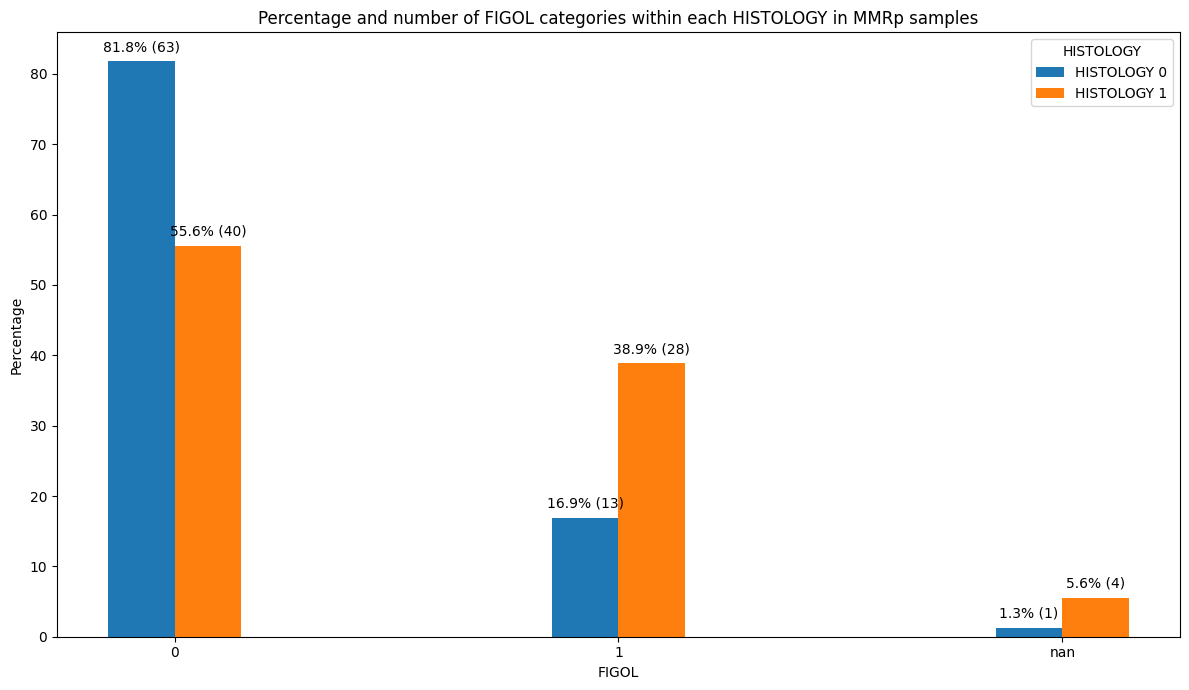

In [63]:
### FIGOL #############
# Calculate frequencies in each group
frequencies_abs = df_mmrp.groupby('HISTOLOGY')['FIGOL'].value_counts().unstack(fill_value=0)  # Frecuencia absoluta
frequencies_pct = df_mmrp.groupby('HISTOLOGY')['FIGOL'].value_counts(normalize=True).unstack(fill_value=0) * 100  # Convertir a porcentaje

# Show tables
print("Absolute frequencies dataframe is:\n", frequencies_abs)
print("Percentages dataframe is:\n", frequencies_pct)

# Graphic
fig, ax = plt.subplots(figsize=(12, 7))

bar_width = 0.15
indices = range(len(frequencies_abs.columns))  

# Create bars for HISTOLOGY categories
for i, histology in enumerate(frequencies_abs.index):
    ax.bar([index + i * bar_width for index in indices], 
           frequencies_pct.loc[histology], 
           width=bar_width, 
           label=f'HISTOLOGY {histology}')

# Add labels and number of cases
for i, histology in enumerate(frequencies_abs.index):
    for index, vital_status in enumerate(frequencies_abs.columns):
        # Etiqueta con el formato: porcentaje (número absoluto)
        label = f'{frequencies_pct.loc[histology, vital_status]:.1f}% ({frequencies_abs.loc[histology, vital_status]})'
        ax.text(index + i * bar_width, 
                frequencies_pct.loc[histology, vital_status] + 1, 
                label, 
                ha='center', va='bottom')

ax.set_title('Percentage and number of FIGOL categories within each HISTOLOGY in MMRp samples')
ax.set_xlabel('FIGOL')
ax.set_ylabel('Percentage')

ax.set_xticks([index + (len(frequencies_abs.index) - 1) * bar_width / 2 for index in indices])
ax.set_xticklabels(frequencies_abs.columns)
ax.legend(title='HISTOLOGY')

plt.xticks(rotation=0)

# Show
plt.tight_layout()
plt.show()

Absolute frequencies dataframe is:
 GRADE      Well differentiated  Moderately differentiated  \
HISTOLOGY                                                   
0                           41                         23   

GRADE      Poorly differentiated  Unknown  
HISTOLOGY                                  
0                              8        5  
Percentages dataframe is:
 GRADE      Well differentiated  Moderately differentiated  \
HISTOLOGY                                                   
0                    53.246753                   29.87013   

GRADE      Poorly differentiated   Unknown  
HISTOLOGY                                   
0                       10.38961  6.493506  


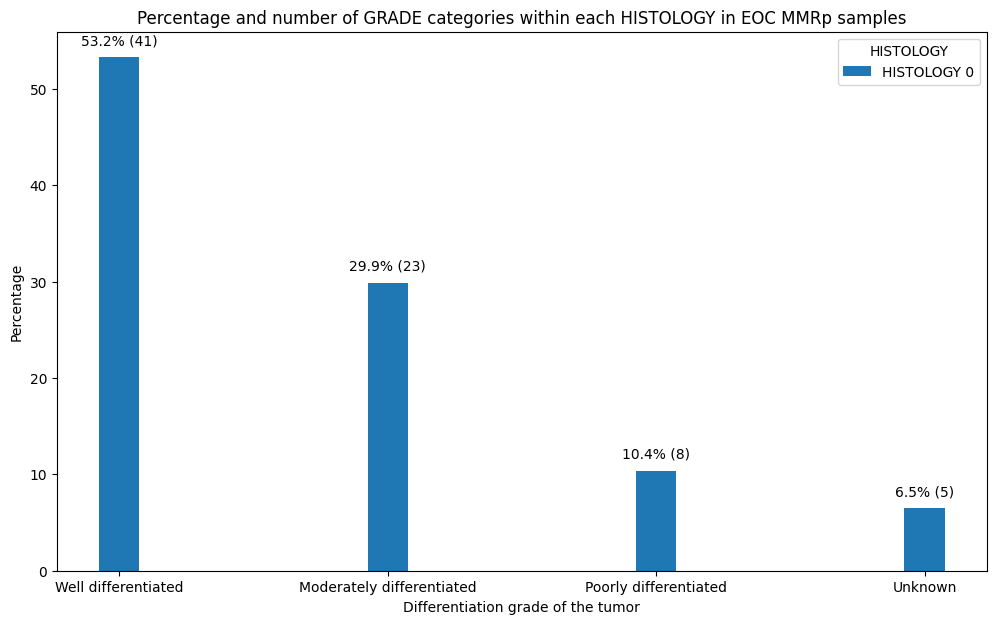

In [64]:
########### GRADE ###########

# Count the frequencies of each GRADE category within each HISTOLOGY category
frequencies_abs = df_eoc_mmrp.groupby('HISTOLOGY')['GRADE'].value_counts().unstack(fill_value=0)  # Absolute frequencies
frequencies_pct = df_eoc_mmrp.groupby('HISTOLOGY')['GRADE'].value_counts(normalize=True).unstack(fill_value=0) * 100  # Convert to percentages

#  Sort rows in the DataFrame based on the desired order of GRADE categories
order = ['Well differentiated', 'Moderately differentiated', 'Poorly differentiated', 'Unknown']
frequencies_abs = frequencies_abs.reindex(columns=order)
frequencies_pct = frequencies_pct.reindex(columns=order)

# Display the tables with absolute numbers and percentages
print("Absolute frequencies dataframe is:\n", frequencies_abs)
print("Percentages dataframe is:\n", frequencies_pct)

#  Set up the plot
fig, ax = plt.subplots(figsize=(12, 7))

# Define the width of the bars and the positions of the groups
bar_width = 0.15
indices = range(len(frequencies_abs.columns))

# Create bars for each HISTOLOGY category
for i, histology in enumerate(frequencies_abs.index):
    ax.bar([index + i * bar_width for index in indices], 
           frequencies_pct.loc[histology],  # Plot percentages
           width=bar_width, 
           label=f'HISTOLOGY {histology}')

# Add percentage labels and absolute number of cases
for histology in frequencies_abs.index:
    for index, grade in enumerate(frequencies_abs.columns):
        # Label with format: percentage (absolute count)
        label = f'{frequencies_pct.loc[histology, grade]:.1f}% ({frequencies_abs.loc[histology, grade]})'
        ax.text(index + histology * bar_width, 
                frequencies_pct.loc[histology, grade] + 1,  # Offset the label slightly above the bar
                label, 
                ha='center', va='bottom')

# Set labels and title
ax.set_title('Percentage and number of GRADE categories within each HISTOLOGY in EOC MMRp samples')
ax.set_xlabel('Differentiation grade of the tumor')
ax.set_ylabel('Percentage')
ax.set_xticks([index + (len(frequencies_abs.index) - 1) * bar_width / 2 for index in indices])
ax.set_xticklabels(frequencies_abs.columns)
ax.legend(title='HISTOLOGY')

# Adjust x-tick labels to be horizontal
plt.xticks(rotation=0)
plt.show()


Absolute frequencies dataframe is:
 RESIDUALa  No  Unknown  Yes
HISTOLOGY                  
0          61       11    5
1          41       17   14
Percentages dataframe is:
 RESIDUALa         No    Unknown        Yes
HISTOLOGY                                 
0          79.220779  14.285714   6.493506
1          56.944444  23.611111  19.444444


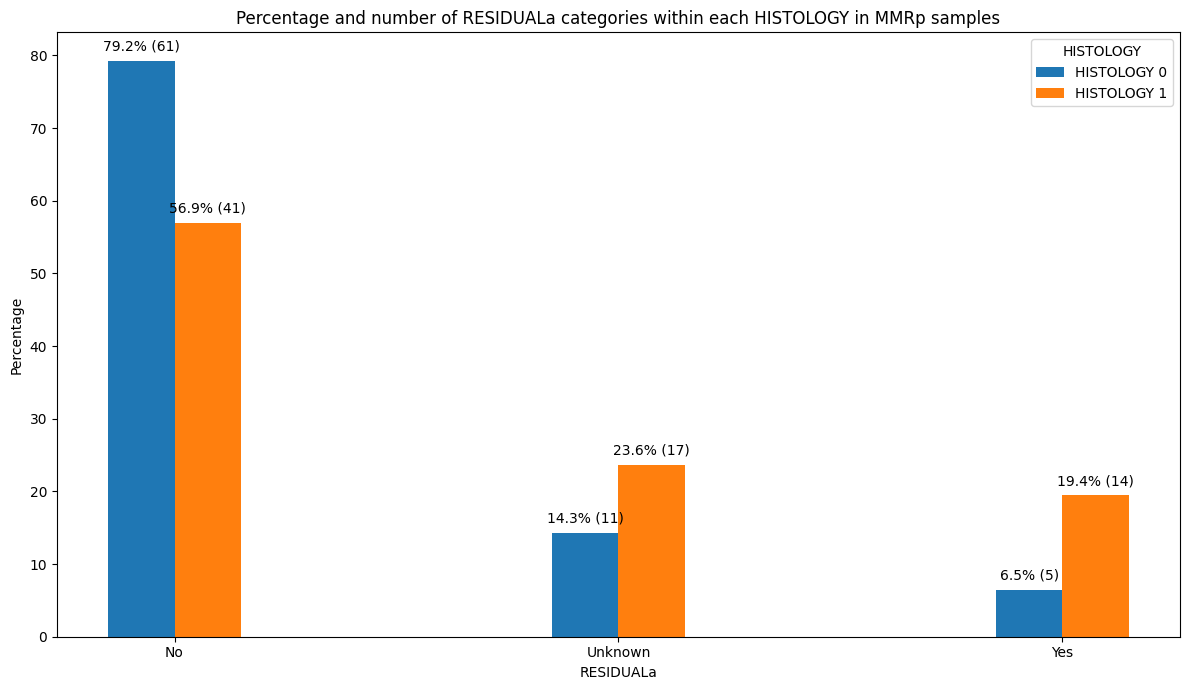

In [65]:
# RESIDUAL DISEASE  ###########
import pandas as pd
import matplotlib.pyplot as plt

frequencies_abs = df_mmrp.groupby('HISTOLOGY')['RESIDUALa'].value_counts().unstack(fill_value=0)  
frequencies_pct = df_mmrp.groupby('HISTOLOGY')['RESIDUALa'].value_counts(normalize=True).unstack(fill_value=0) * 100 


# Show tables
print("Absolute frequencies dataframe is:\n", frequencies_abs)
print("Percentages dataframe is:\n", frequencies_pct)

# Graphic
fig, ax = plt.subplots(figsize=(12, 7))

bar_width = 0.15
indices = range(len(frequencies_abs.columns)) 

# Create bars for every HISTOLOGY category
for i, histology in enumerate(frequencies_abs.index):
    ax.bar([index + i * bar_width for index in indices], 
           frequencies_pct.loc[histology], 
           width=bar_width, 
           label=f'HISTOLOGY {histology}')

# Add labels of percentages and number of cases
for i, histology in enumerate(frequencies_abs.index):
    for index, vital_status in enumerate(frequencies_abs.columns):
        label = f'{frequencies_pct.loc[histology, vital_status]:.1f}% ({frequencies_abs.loc[histology, vital_status]})'
        ax.text(index + i * bar_width, 
                frequencies_pct.loc[histology, vital_status] + 1,
                label, 
                ha='center', va='bottom')

ax.set_title('Percentage and number of RESIDUALa categories within each HISTOLOGY in MMRp samples')
ax.set_xlabel('RESIDUALa')
ax.set_ylabel('Percentage')

ax.set_xticks([index + (len(frequencies_abs.index) - 1) * bar_width / 2 for index in indices])
ax.set_xticklabels(frequencies_abs.columns)
ax.legend(title='HISTOLOGY')

plt.xticks(rotation=0)

# Show
plt.tight_layout()
plt.show()

In [ ]:
### ANALYSIS OF CLINICAL VARIABLES IN MMRd GROUP #########

In [66]:
# Define subgroups
df_mmrd=df[df['MMR_final_status']=='MMRd']
df_eoc_mmrd=df[(df['MMR_final_status']=='MMRd') & (df['HISTOLOGY']==0)]
print(len(df_mmrd))
print(len(df_eoc_mmrd))

17
12


Absolute frequencies dataframe is:
 FIGOL       0  1
HISTOLOGY       
0          11  1
1           3  2
Percentages dataframe is:
 FIGOL              0          1
HISTOLOGY                      
0          91.666667   8.333333
1          60.000000  40.000000


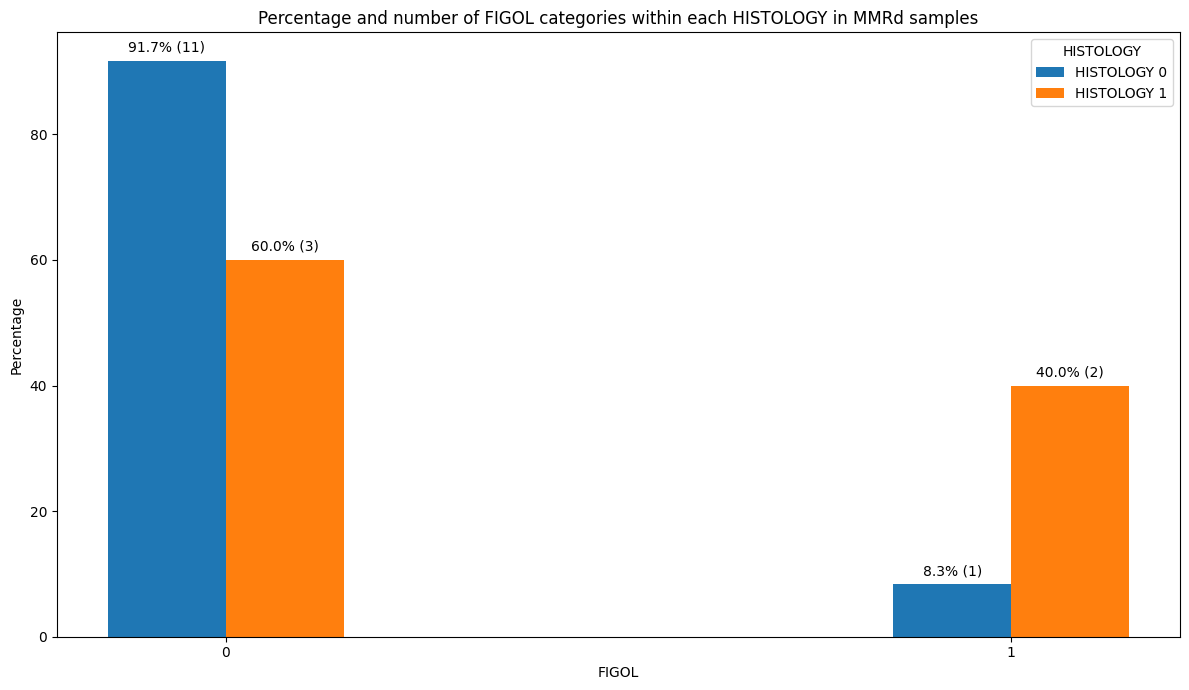

In [67]:
### FIGOL #############
# Calculate frequencies in each group
frequencies_abs = df_mmrd.groupby('HISTOLOGY')['FIGOL'].value_counts().unstack(fill_value=0) 
frequencies_pct = df_mmrd.groupby('HISTOLOGY')['FIGOL'].value_counts(normalize=True).unstack(fill_value=0) * 100 

# Show tables
print("Absolute frequencies dataframe is:\n", frequencies_abs)
print("Percentages dataframe is:\n", frequencies_pct)

# Graphic
fig, ax = plt.subplots(figsize=(12, 7))

bar_width = 0.15
indices = range(len(frequencies_abs.columns))  

# Create bars for HISTOLOGY categories
for i, histology in enumerate(frequencies_abs.index):
    ax.bar([index + i * bar_width for index in indices], 
           frequencies_pct.loc[histology], 
           width=bar_width, 
           label=f'HISTOLOGY {histology}')

# Add labels and number of cases
for i, histology in enumerate(frequencies_abs.index):
    for index, vital_status in enumerate(frequencies_abs.columns):
        # Etiqueta con el formato: porcentaje (número absoluto)
        label = f'{frequencies_pct.loc[histology, vital_status]:.1f}% ({frequencies_abs.loc[histology, vital_status]})'
        ax.text(index + i * bar_width, 
                frequencies_pct.loc[histology, vital_status] + 1, 
                label, 
                ha='center', va='bottom')

ax.set_title('Percentage and number of FIGOL categories within each HISTOLOGY in MMRd samples')
ax.set_xlabel('FIGOL')
ax.set_ylabel('Percentage')

ax.set_xticks([index + (len(frequencies_abs.index) - 1) * bar_width / 2 for index in indices])
ax.set_xticklabels(frequencies_abs.columns)
ax.legend(title='HISTOLOGY')

plt.xticks(rotation=0)

# Show
plt.tight_layout()
plt.show()

Absolute frequencies dataframe is:
 GRADE      Well differentiated  Moderately differentiated  \
HISTOLOGY                                                   
0                            5                          4   

GRADE      Poorly differentiated  Unknown  
HISTOLOGY                                  
0                              2        1  
Percentages dataframe is:
 GRADE      Well differentiated  Moderately differentiated  \
HISTOLOGY                                                   
0                    41.666667                  33.333333   

GRADE      Poorly differentiated   Unknown  
HISTOLOGY                                   
0                      16.666667  8.333333  


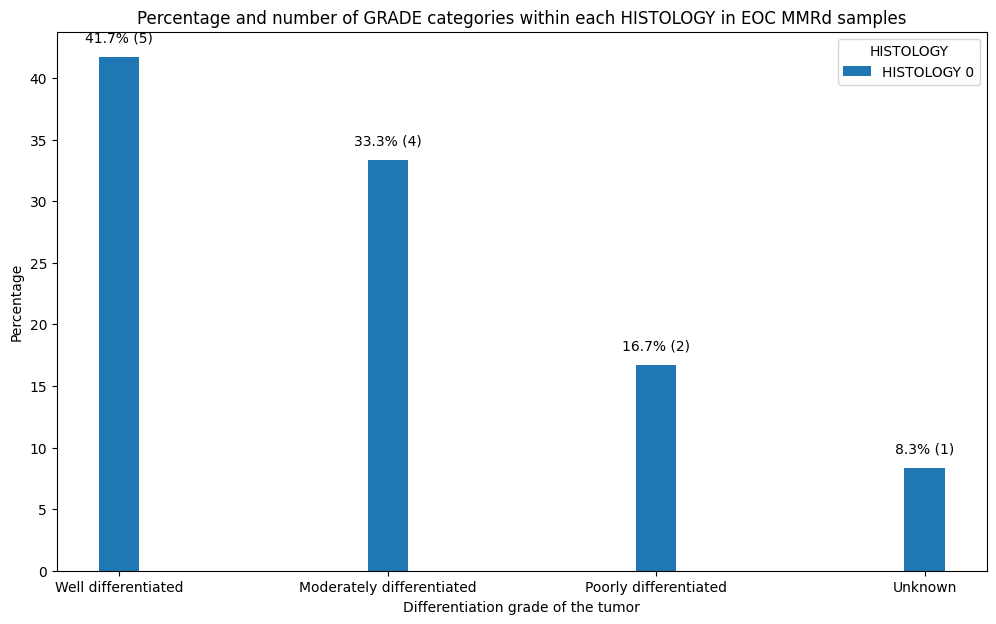

In [68]:
########### GRADE ###########

# Count the frequencies of each GRADE category within each HISTOLOGY category
frequencies_abs = df_eoc_mmrd.groupby('HISTOLOGY')['GRADE'].value_counts().unstack(fill_value=0)  # Absolute frequencies
frequencies_pct = df_eoc_mmrd.groupby('HISTOLOGY')['GRADE'].value_counts(normalize=True).unstack(fill_value=0) * 100  # Convert to percentages

#  Sort rows in the DataFrame based on the desired order of GRADE categories
order = ['Well differentiated', 'Moderately differentiated', 'Poorly differentiated', 'Unknown']
frequencies_abs = frequencies_abs.reindex(columns=order)
frequencies_pct = frequencies_pct.reindex(columns=order)

# Display the tables with absolute numbers and percentages
print("Absolute frequencies dataframe is:\n", frequencies_abs)
print("Percentages dataframe is:\n", frequencies_pct)

#  Set up the plot
fig, ax = plt.subplots(figsize=(12, 7))

# Define the width of the bars and the positions of the groups
bar_width = 0.15
indices = range(len(frequencies_abs.columns))

# Create bars for each HISTOLOGY category
for i, histology in enumerate(frequencies_abs.index):
    ax.bar([index + i * bar_width for index in indices], 
           frequencies_pct.loc[histology],  # Plot percentages
           width=bar_width, 
           label=f'HISTOLOGY {histology}')

# Add percentage labels and absolute number of cases
for histology in frequencies_abs.index:
    for index, grade in enumerate(frequencies_abs.columns):
        # Label with format: percentage (absolute count)
        label = f'{frequencies_pct.loc[histology, grade]:.1f}% ({frequencies_abs.loc[histology, grade]})'
        ax.text(index + histology * bar_width, 
                frequencies_pct.loc[histology, grade] + 1,  # Offset the label slightly above the bar
                label, 
                ha='center', va='bottom')

# Set labels and title
ax.set_title('Percentage and number of GRADE categories within each HISTOLOGY in EOC MMRd samples')
ax.set_xlabel('Differentiation grade of the tumor')
ax.set_ylabel('Percentage')
ax.set_xticks([index + (len(frequencies_abs.index) - 1) * bar_width / 2 for index in indices])
ax.set_xticklabels(frequencies_abs.columns)
ax.legend(title='HISTOLOGY')

# Adjust x-tick labels to be horizontal
plt.xticks(rotation=0)
plt.show()

Absolute frequencies dataframe is:
 RESIDUALa  No  Unknown  Yes
HISTOLOGY                  
0           8        4    0
1           1        2    2
Percentages dataframe is:
 RESIDUALa         No    Unknown   Yes
HISTOLOGY                            
0          66.666667  33.333333   0.0
1          20.000000  40.000000  40.0


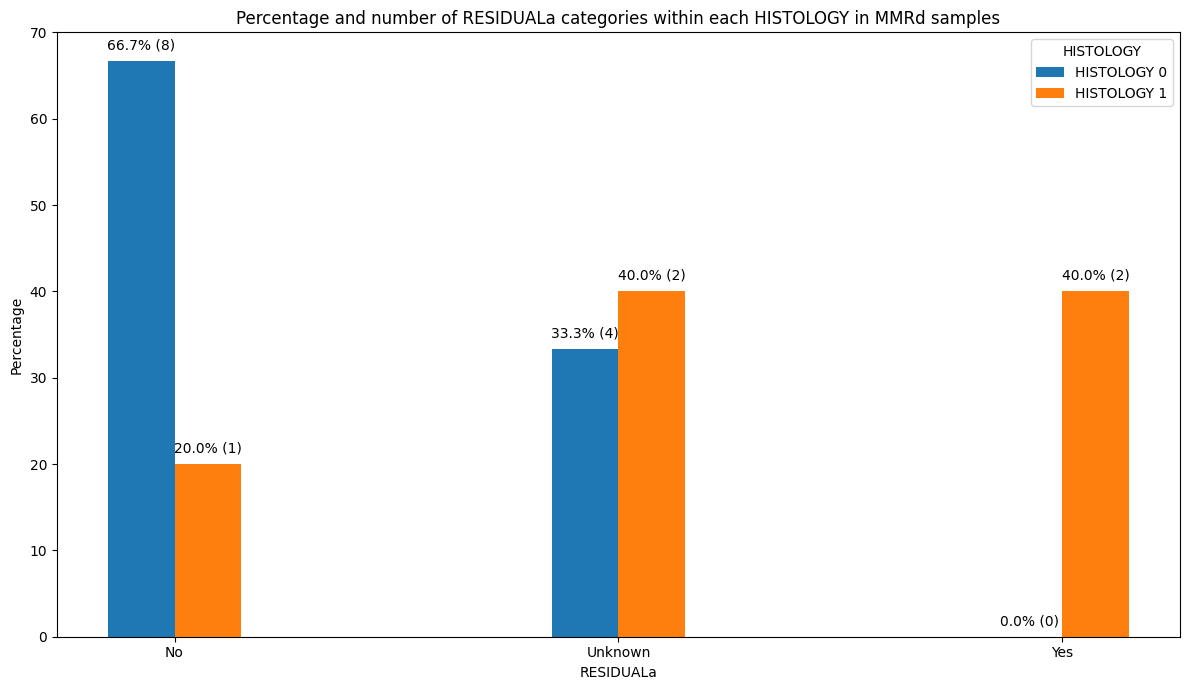

In [69]:
# RESIDUAL DISEASE ################

frequencies_abs = df_mmrd.groupby('HISTOLOGY')['RESIDUALa'].value_counts().unstack(fill_value=0)  
frequencies_pct = df_mmrd.groupby('HISTOLOGY')['RESIDUALa'].value_counts(normalize=True).unstack(fill_value=0) * 100 


# Show tables
print("Absolute frequencies dataframe is:\n", frequencies_abs)
print("Percentages dataframe is:\n", frequencies_pct)

# Graphic
fig, ax = plt.subplots(figsize=(12, 7))

bar_width = 0.15
indices = range(len(frequencies_abs.columns)) 

# Create bars for every HISTOLOGY category
for i, histology in enumerate(frequencies_abs.index):
    ax.bar([index + i * bar_width for index in indices], 
           frequencies_pct.loc[histology], 
           width=bar_width, 
           label=f'HISTOLOGY {histology}')

# Add labels of percentages and number of cases
for i, histology in enumerate(frequencies_abs.index):
    for index, vital_status in enumerate(frequencies_abs.columns):
        label = f'{frequencies_pct.loc[histology, vital_status]:.1f}% ({frequencies_abs.loc[histology, vital_status]})'
        ax.text(index + i * bar_width, 
                frequencies_pct.loc[histology, vital_status] + 1,
                label, 
                ha='center', va='bottom')

ax.set_title('Percentage and number of RESIDUALa categories within each HISTOLOGY in MMRd samples')
ax.set_xlabel('RESIDUALa')
ax.set_ylabel('Percentage')

ax.set_xticks([index + (len(frequencies_abs.index) - 1) * bar_width / 2 for index in indices])
ax.set_xticklabels(frequencies_abs.columns)
ax.legend(title='HISTOLOGY')

plt.xticks(rotation=0)

# Show
plt.tight_layout()
plt.show()

In [70]:
# Calculate mean and standard deviation of 'AGE' for each 'HISTOLOGY' category in df_mmrp
print("Statistics for 'AGE' by 'HISTOLOGY' category in df_mmrp:")
age_stats_mmrp = df_mmrp.groupby('HISTOLOGY')['AGE'].agg(['mean', 'std','median'])
print(age_stats_mmrp)

# Calculate mean and standard deviation of 'AGE' for each 'HISTOLOGY' category in df_mmrd
print("\nStatistics for 'AGE' by 'HISTOLOGY' category in df_mmrd:")
age_stats_mmrd = df_mmrd.groupby('HISTOLOGY')['AGE'].agg(['mean', 'std','median'])
print(age_stats_mmrd)


Statistics for 'AGE' by 'HISTOLOGY' category in df_mmrp:
                mean        std median
HISTOLOGY                             
0          51.545455  12.133626   50.0
1          54.291667  11.284337   52.5

Statistics for 'AGE' by 'HISTOLOGY' category in df_mmrd:
           mean       std median
HISTOLOGY                       
0          49.5  7.367003   51.5
1          41.0  8.336666   39.0


Absolute frequencies dataframe is:
 VITAL STATUS  Alive  Dead  Unknown
HISTOLOGY                         
0                56    18        3
1                44    23        5
Percentages dataframe is:
 VITAL STATUS      Alive       Dead   Unknown
HISTOLOGY                                   
0             72.727273  23.376623  3.896104
1             61.111111  31.944444  6.944444


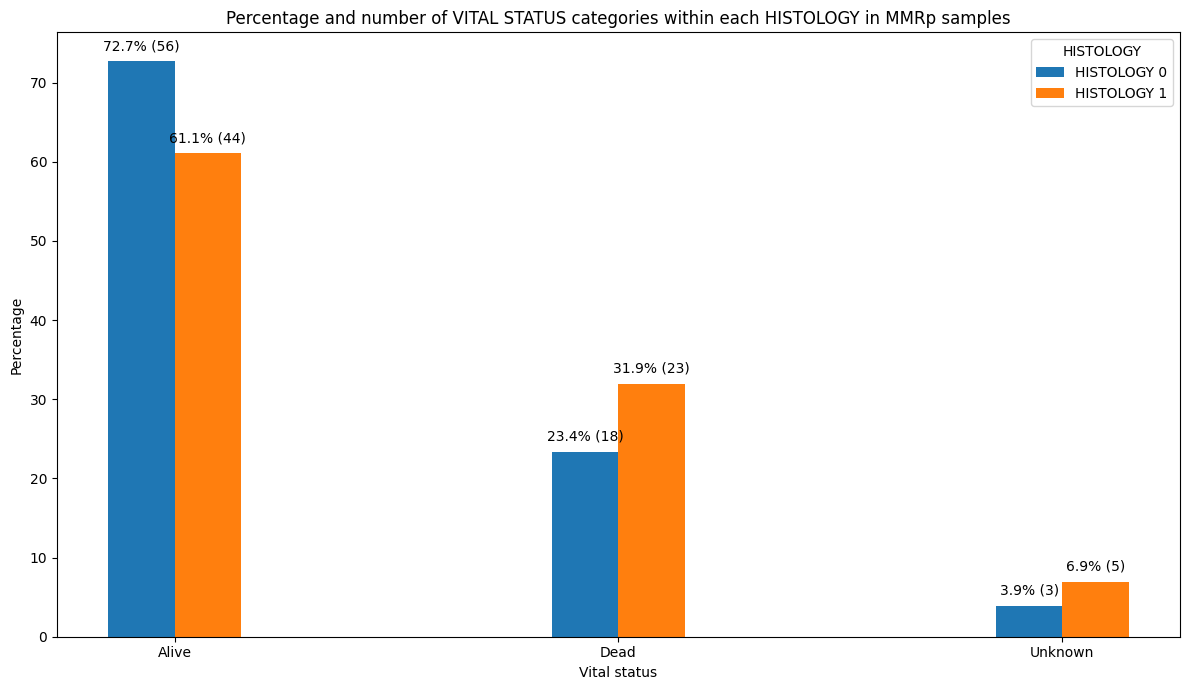

In [71]:
# Frequencies in VITAL STATUS IN EACH HISTOLOGY SUBTYPE IN MMRp SAMPLES ############

# Count frequencies
frequencies_abs = df_mmrp.groupby('HISTOLOGY')['VITAL STATUS'].value_counts().unstack(fill_value=0)  # Absolute
frequencies_pct = df_mmrp.groupby('HISTOLOGY')['VITAL STATUS'].value_counts(normalize=True).unstack(fill_value=0) * 100  # Percentages

# Show tables
print("Absolute frequencies dataframe is:\n", frequencies_abs)
print("Percentages dataframe is:\n", frequencies_pct)

# Graphic
fig, ax = plt.subplots(figsize=(12, 7))

bar_width = 0.15
indices = range(len(frequencies_abs.columns))  

# Create bars for each HISTOLOGY category
for i, histology in enumerate(frequencies_abs.index):
    ax.bar([index + i * bar_width for index in indices], 
           frequencies_pct.loc[histology], 
           width=bar_width, 
           label=f'HISTOLOGY {histology}')

# Add labels
for i, histology in enumerate(frequencies_abs.index):
    for index, vital_status in enumerate(frequencies_abs.columns):
        label = f'{frequencies_pct.loc[histology, vital_status]:.1f}% ({frequencies_abs.loc[histology, vital_status]})'
        ax.text(index + i * bar_width, 
                frequencies_pct.loc[histology, vital_status] + 1, 
                label, 
                ha='center', va='bottom')

ax.set_title('Percentage and number of VITAL STATUS categories within each HISTOLOGY in MMRp samples')
ax.set_xlabel('Vital status')
ax.set_ylabel('Percentage')

ax.set_xticks([index + (len(frequencies_abs.index) - 1) * bar_width / 2 for index in indices])
ax.set_xticklabels(frequencies_abs.columns)
ax.legend(title='HISTOLOGY')

plt.xticks(rotation=0)

# Show
plt.tight_layout()
plt.show()

Absolute frequencies dataframe is:
 VITAL STATUS  Alive  Dead
HISTOLOGY                
0                10     2
1                 4     1
Percentages dataframe is:
 VITAL STATUS      Alive       Dead
HISTOLOGY                         
0             83.333333  16.666667
1             80.000000  20.000000


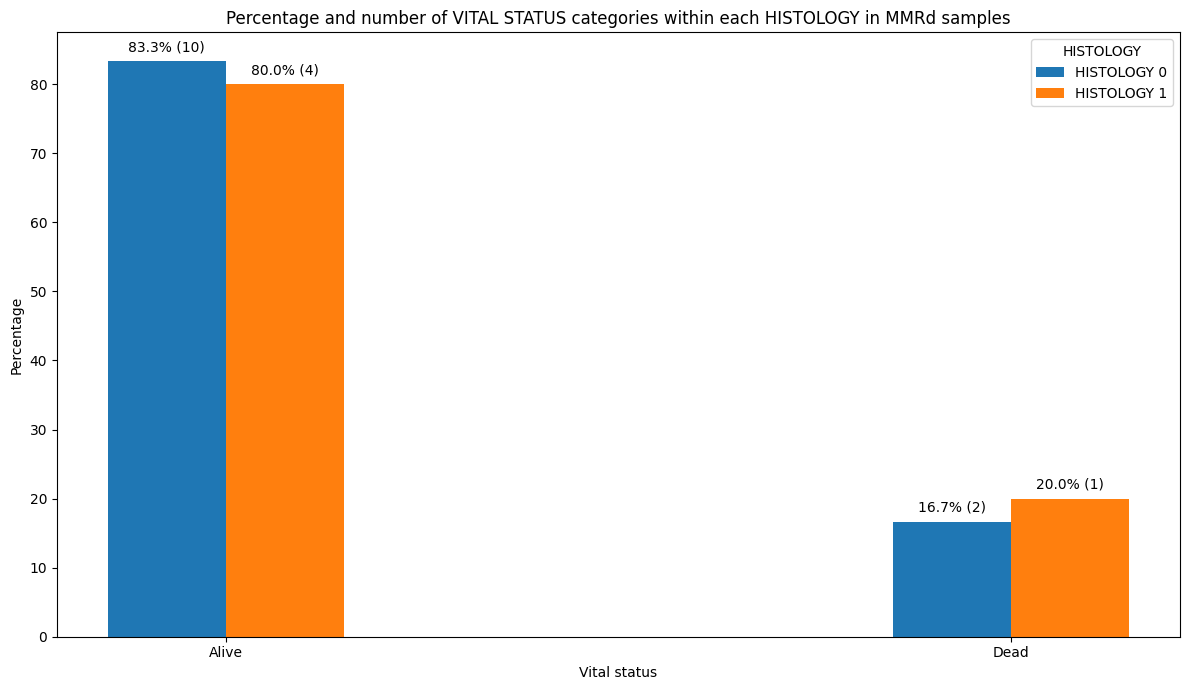

In [72]:
# Frequencies in VITAL STATUS IN EACH HISTOLOGY SUBTYPE IN MMRd SAMPLES ############

# Count frequencies
frequencies_abs = df_mmrd.groupby('HISTOLOGY')['VITAL STATUS'].value_counts().unstack(fill_value=0)  # Absolute
frequencies_pct = df_mmrd.groupby('HISTOLOGY')['VITAL STATUS'].value_counts(normalize=True).unstack(fill_value=0) * 100  # Percentages

# Show tables
print("Absolute frequencies dataframe is:\n", frequencies_abs)
print("Percentages dataframe is:\n", frequencies_pct)

# Graphic
fig, ax = plt.subplots(figsize=(12, 7))

bar_width = 0.15
indices = range(len(frequencies_abs.columns))  

# Create bars for each HISTOLOGY category
for i, histology in enumerate(frequencies_abs.index):
    ax.bar([index + i * bar_width for index in indices], 
           frequencies_pct.loc[histology], 
           width=bar_width, 
           label=f'HISTOLOGY {histology}')

# Add labels
for i, histology in enumerate(frequencies_abs.index):
    for index, vital_status in enumerate(frequencies_abs.columns):
        label = f'{frequencies_pct.loc[histology, vital_status]:.1f}% ({frequencies_abs.loc[histology, vital_status]})'
        ax.text(index + i * bar_width, 
                frequencies_pct.loc[histology, vital_status] + 1, 
                label, 
                ha='center', va='bottom')

ax.set_title('Percentage and number of VITAL STATUS categories within each HISTOLOGY in MMRd samples')
ax.set_xlabel('Vital status')
ax.set_ylabel('Percentage')

ax.set_xticks([index + (len(frequencies_abs.index) - 1) * bar_width / 2 for index in indices])
ax.set_xticklabels(frequencies_abs.columns)
ax.legend(title='HISTOLOGY')

plt.xticks(rotation=0)

# Show
plt.tight_layout()
plt.show()

Absolute frequencies dataframe is:
 FIGOa       1   2   3  4  nan
HISTOLOGY                    
0          52  11   9  4    1
1          34   6  19  9    4
Percentages dataframe is:
 FIGOa              1          2          3          4       nan
HISTOLOGY                                                      
0          67.532468  14.285714  11.688312   5.194805  1.298701
1          47.222222   8.333333  26.388889  12.500000  5.555556


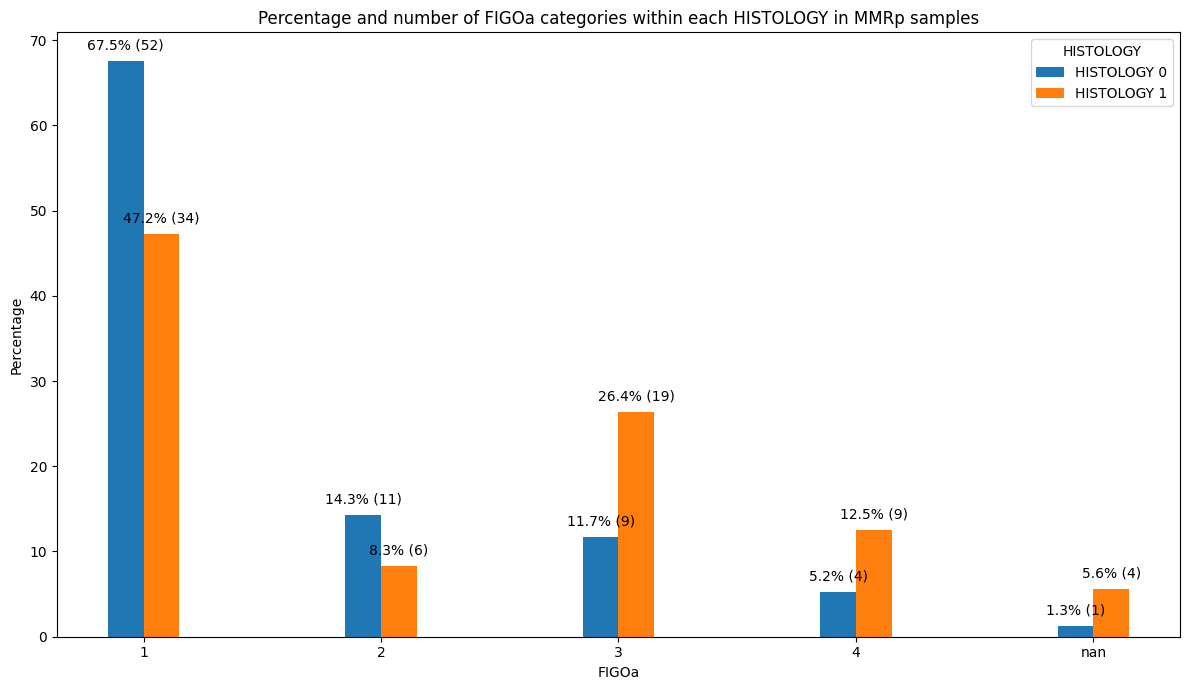

In [73]:
# Frequencies in FIGO STAGE (FIGOa column) IN EACH HISTOLOGY SUBTYPE IN MMRp SAMPLES ###########

# Calculate frequencies in each group
frequencies_abs = df_mmrp.groupby('HISTOLOGY')['FIGOa'].value_counts().unstack(fill_value=0)  # Absolute
frequencies_pct = df_mmrp.groupby('HISTOLOGY')['FIGOa'].value_counts(normalize=True).unstack(fill_value=0) * 100  # Percentages

# Show tables
print("Absolute frequencies dataframe is:\n", frequencies_abs)
print("Percentages dataframe is:\n", frequencies_pct)

# Graphic
fig, ax = plt.subplots(figsize=(12, 7))

bar_width = 0.15
indices = range(len(frequencies_abs.columns))  # Represent categories of FIGOa

# Create bars for every category of HISTOLOGY
for i, histology in enumerate(frequencies_abs.index):
    ax.bar([index + i * bar_width for index in indices], 
           frequencies_pct.loc[histology],  
           width=bar_width, 
           label=f'HISTOLOGY {histology}')

# Add labels
for i, histology in enumerate(frequencies_abs.index):
    for index, vital_status in enumerate(frequencies_abs.columns):
        # Label with absolute percentage
        label = f'{frequencies_pct.loc[histology, vital_status]:.1f}% ({frequencies_abs.loc[histology, vital_status]})'
        ax.text(index + i * bar_width, 
                frequencies_pct.loc[histology, vital_status] + 1,  # Desplazar un poco la etiqueta para que no quede dentro de la barra
                label, 
                ha='center', va='bottom')

ax.set_title('Percentage and number of FIGOa categories within each HISTOLOGY in MMRp samples')
ax.set_xlabel('FIGOa')
ax.set_ylabel('Percentage')

ax.set_xticks([index + (len(frequencies_abs.index) - 1) * bar_width / 2 for index in indices])
ax.set_xticklabels(frequencies_abs.columns)
ax.legend(title='HISTOLOGY')

plt.xticks(rotation=0)

# Show
plt.tight_layout()
plt.show()

Absolute frequencies dataframe is:
 FIGOa       1  2  3  4
HISTOLOGY             
0          10  1  1  0
1           2  1  1  1
Percentages dataframe is:
 FIGOa              1          2          3     4
HISTOLOGY                                       
0          83.333333   8.333333   8.333333   0.0
1          40.000000  20.000000  20.000000  20.0


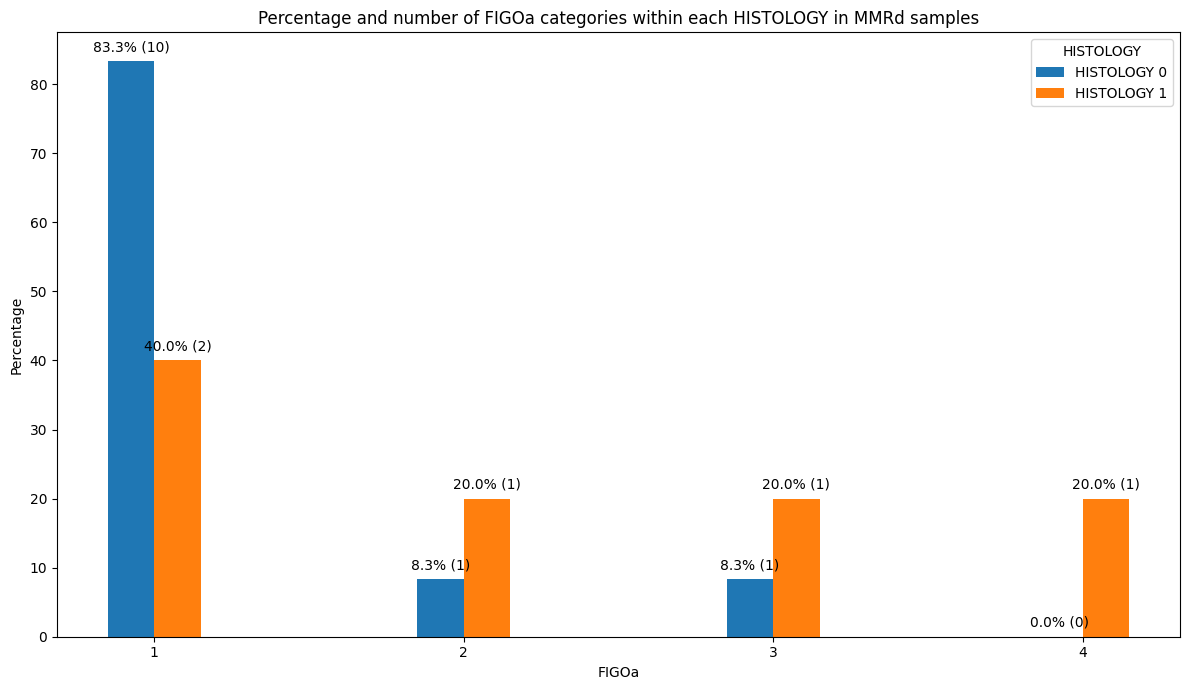

In [74]:
# Frequencies in FIGO STAGE (FIGOa column) IN EACH HISTOLOGY SUBTYPE IN MMRd SAMPLES ###########

# Calculate frequencies in each group
frequencies_abs = df_mmrd.groupby('HISTOLOGY')['FIGOa'].value_counts().unstack(fill_value=0)  # Absolute
frequencies_pct = df_mmrd.groupby('HISTOLOGY')['FIGOa'].value_counts(normalize=True).unstack(fill_value=0) * 100  # Percentages

# Show tables
print("Absolute frequencies dataframe is:\n", frequencies_abs)
print("Percentages dataframe is:\n", frequencies_pct)

# Graphic
fig, ax = plt.subplots(figsize=(12, 7))

bar_width = 0.15
indices = range(len(frequencies_abs.columns))  # Represent categories of FIGOa

# Create bars for every category of HISTOLOGY
for i, histology in enumerate(frequencies_abs.index):
    ax.bar([index + i * bar_width for index in indices], 
           frequencies_pct.loc[histology],  
           width=bar_width, 
           label=f'HISTOLOGY {histology}')

# Add labels
for i, histology in enumerate(frequencies_abs.index):
    for index, vital_status in enumerate(frequencies_abs.columns):
        # Label with absolute percentage
        label = f'{frequencies_pct.loc[histology, vital_status]:.1f}% ({frequencies_abs.loc[histology, vital_status]})'
        ax.text(index + i * bar_width, 
                frequencies_pct.loc[histology, vital_status] + 1,  # Desplazar un poco la etiqueta para que no quede dentro de la barra
                label, 
                ha='center', va='bottom')

ax.set_title('Percentage and number of FIGOa categories within each HISTOLOGY in MMRd samples')
ax.set_xlabel('FIGOa')
ax.set_ylabel('Percentage')

ax.set_xticks([index + (len(frequencies_abs.index) - 1) * bar_width / 2 for index in indices])
ax.set_xticklabels(frequencies_abs.columns)
ax.legend(title='HISTOLOGY')

plt.xticks(rotation=0)

# Show
plt.tight_layout()
plt.show()

In [75]:
#### STATISTICAL TESTS TO CHECK SIGNIFICANCE BETWEEN MMRp AND MMRd GROUPS IN THEIR DISTRIBUTION IN THE DIFFERENT CLINICAL VARIABLES #############
### 1.FIGOL
import pandas as pd
from scipy.stats import fisher_exact

# Filter
df_filtered = df[df['MMR_final_status'].isin(['MMRd', 'MMRp'])]
df_filtered = df_filtered[df_filtered['FIGOL'].isin(['0', '1'])]

# Step 2: Create a contingency table for 'MMR_final_status' and 'FIGOL' on the filtered dataset
contingency_table = pd.crosstab(df_filtered['MMR_final_status'], df_filtered['FIGOL'])
print("Contingency Table (without NaNs):")
print(contingency_table)

# Step 3: Check if the contingency table is 2x2 and apply Fisher's Exact Test
if contingency_table.shape == (2, 2):
    odds_ratio, p_value = fisher_exact(contingency_table)
    
    # Step 4: Output the results of Fisher's Exact Test
    print("\nFisher's Exact Test Results:")
    print(f"Odds Ratio: {odds_ratio:.2f}")
    print(f"P-value: {p_value:.4f}")

    # Step 5: Interpret the p-value for statistical significance
    if p_value < 0.05:
        print("\nConclusion: There is a significant difference in the distribution of 'MMR_final_status' across 'FIGOL' categories in EOC+CCOC.")
    else:
        print("\nConclusion: There is no significant difference in the distribution of 'MMR_final_status' across 'FIGOL' categories in EOC+CCOC.")
else:
    print("The table is not 2x2; Fisher's Exact Test is not appropriate.")



Contingency Table (without NaNs):
FIGOL               0   1
MMR_final_status         
MMRd               14   3
MMRp              103  41

Fisher's Exact Test Results:
Odds Ratio: 1.86
P-value: 0.4057

Conclusion: There is no significant difference in the distribution of 'MMR_final_status' across 'FIGOL' categories in EOC+CCOC.


In [76]:
### ONLY IN EOC SAMPLES ###########
df_eoc=df[df['HISTOLOGY']==0]
# Filter
df_filtered = df_eoc[df_eoc['MMR_final_status'].isin(['MMRd', 'MMRp'])]
df_filtered = df_filtered[df_filtered['FIGOL'].isin(['0', '1'])]

# Step 2: Create a contingency table for 'MMR_final_status' and 'FIGOL' on the filtered dataset
contingency_table = pd.crosstab(df_filtered['MMR_final_status'], df_filtered['FIGOL'])
print("Contingency Table (without NaNs):")
print(contingency_table)

# Step 3: Check if the contingency table is 2x2 and apply Fisher's Exact Test
if contingency_table.shape == (2, 2):
    odds_ratio, p_value = fisher_exact(contingency_table)
    
    # Step 4: Output the results of Fisher's Exact Test
    print("\nFisher's Exact Test Results:")
    print(f"Odds Ratio: {odds_ratio:.2f}")
    print(f"P-value: {p_value:.4f}")

    # Step 5: Interpret the p-value for statistical significance
    if p_value < 0.05:
        print("\nConclusion: There is a significant difference in the distribution of 'MMR_final_status' across 'FIGOL' categories in EOC.")
    else:
        print("\nConclusion: There is no significant difference in the distribution of 'MMR_final_status' across 'FIGOL' categories in EOC.")
else:
    print("The table is not 2x2; Fisher's Exact Test is not appropriate.")

Contingency Table (without NaNs):
FIGOL              0   1
MMR_final_status        
MMRd              11   1
MMRp              63  13

Fisher's Exact Test Results:
Odds Ratio: 2.27
P-value: 0.6817

Conclusion: There is no significant difference in the distribution of 'MMR_final_status' across 'FIGOL' categories in EOC.


In [54]:
### ONLY IN CC SAMPLES ###########
df_cc=df[df['HISTOLOGY']==1]
# Filter
df_filtered = df_cc[df_cc['MMR_final_status'].isin(['MMRd', 'MMRp'])]
df_filtered = df_filtered[df_filtered['FIGOL'].isin(['0', '1'])]

# Step 2: Create a contingency table for 'MMR_final_status' and 'FIGOL' on the filtered dataset
contingency_table = pd.crosstab(df_filtered['MMR_final_status'], df_filtered['FIGOL'])
print("Contingency Table (without NaNs):")
print(contingency_table)

# Step 3: Check if the contingency table is 2x2 and apply Fisher's Exact Test
if contingency_table.shape == (2, 2):
    odds_ratio, p_value = fisher_exact(contingency_table)
    
    # Step 4: Output the results of Fisher's Exact Test
    print("\nFisher's Exact Test Results:")
    print(f"Odds Ratio: {odds_ratio:.2f}")
    print(f"P-value: {p_value:.4f}")

    # Step 5: Interpret the p-value for statistical significance
    if p_value < 0.05:
        print("\nConclusion: There is a significant difference in the distribution of 'MMR_final_status' across 'FIGOL' categories in CC.")
    else:
        print("\nConclusion: There is no significant difference in the distribution of 'MMR_final_status' across 'FIGOL' categories in CC.")
else:
    print("The table is not 2x2; Fisher's Exact Test is not appropriate.")

Contingency Table (without NaNs):
FIGOL              0   1
MMR_final_status        
MMRd               3   2
MMRp              40  28

Fisher's Exact Test Results:
Odds Ratio: 1.05
P-value: 1.0000

Conclusion: There is no significant difference in the distribution of 'MMR_final_status' across 'FIGOL' categories in CC.


In [59]:
### 2.RESIDUALa
# Filter
df_filtered = df[df['MMR_final_status'].isin(['MMRd', 'MMRp'])]
df_filtered = df_filtered[df_filtered['RESIDUALa'].isin(['No', 'Yes'])]

# Step 2: Create a contingency table for 'MMR_final_status' and 'FIGOL' on the filtered dataset
contingency_table = pd.crosstab(df_filtered['MMR_final_status'], df_filtered['RESIDUALa'])
print("Contingency Table (without NaNs):")
print(contingency_table)

# Step 3: Check if the contingency table is 2x2 and apply Fisher's Exact Test
if contingency_table.shape == (2, 2):
    odds_ratio, p_value = fisher_exact(contingency_table)
    
    # Step 4: Output the results of Fisher's Exact Test
    print("\nFisher's Exact Test Results:")
    print(f"Odds Ratio: {odds_ratio:.2f}")
    print(f"P-value: {p_value:.4f}")

    # Step 5: Interpret the p-value for statistical significance
    if p_value < 0.05:
        print("\nConclusion: There is a significant difference in the distribution of 'MMR_final_status' across 'RESIDUALa' categories in EOC+CCOC.")
    else:
        print("\nConclusion: There is no significant difference in the distribution of 'MMR_final_status' across 'RESIDUALa' categories in EOC+CCOC.")
else:
    print("The table is not 2x2; Fisher's Exact Test is not appropriate.")


Contingency Table (without NaNs):
RESIDUALa          No  Yes
MMR_final_status          
MMRd                9    2
MMRp              102   19

Fisher's Exact Test Results:
Odds Ratio: 0.84
P-value: 0.6873

Conclusion: There is no significant difference in the distribution of 'MMR_final_status' across 'RESIDUALa' categories in EOC+CCOC.


In [56]:
### 2.RESIDUALa only in EOC
# Filter
df_filtered = df_eoc[df_eoc['MMR_final_status'].isin(['MMRd', 'MMRp'])]
df_filtered = df_filtered[df_filtered['RESIDUALa'].isin(['No', 'Yes'])]

# Step 2: Create a contingency table for 'MMR_final_status' and 'FIGOL' on the filtered dataset
contingency_table = pd.crosstab(df_filtered['MMR_final_status'], df_filtered['RESIDUALa'])
print("Contingency Table (without NaNs):")
print(contingency_table)

# Step 3: Check if the contingency table is 2x2 and apply Fisher's Exact Test
if contingency_table.shape == (2, 2):
    odds_ratio, p_value = fisher_exact(contingency_table)
    
    # Step 4: Output the results of Fisher's Exact Test
    print("\nFisher's Exact Test Results:")
    print(f"Odds Ratio: {odds_ratio:.2f}")
    print(f"P-value: {p_value:.4f}")

    # Step 5: Interpret the p-value for statistical significance
    if p_value < 0.05:
        print("\nConclusion: There is a significant difference in the distribution of 'MMR_final_status' across 'RESIDUALa' categories in EOC.")
    else:
        print("\nConclusion: There is no significant difference in the distribution of 'MMR_final_status' across 'RESIDUALa' categories in EOC.")
else:
    print("The table is not 2x2; Fisher's Exact Test is not appropriate.")

Contingency Table (without NaNs):
RESIDUALa         No  Yes
MMR_final_status         
MMRd               8    0
MMRp              61    5

Fisher's Exact Test Results:
Odds Ratio: inf
P-value: 1.0000

Conclusion: There is no significant difference in the distribution of 'MMR_final_status' across 'RESIDUALa' categories in EOC.


In [57]:
### 2.RESIDUALa only in CC
# Filter
df_filtered = df_cc[df_cc['MMR_final_status'].isin(['MMRd', 'MMRp'])]
df_filtered = df_filtered[df_filtered['RESIDUALa'].isin(['No', 'Yes'])]

# Step 2: Create a contingency table for 'MMR_final_status' and 'FIGOL' on the filtered dataset
contingency_table = pd.crosstab(df_filtered['MMR_final_status'], df_filtered['RESIDUALa'])
print("Contingency Table (without NaNs):")
print(contingency_table)

# Step 3: Check if the contingency table is 2x2 and apply Fisher's Exact Test
if contingency_table.shape == (2, 2):
    odds_ratio, p_value = fisher_exact(contingency_table)
    
    # Step 4: Output the results of Fisher's Exact Test
    print("\nFisher's Exact Test Results:")
    print(f"Odds Ratio: {odds_ratio:.2f}")
    print(f"P-value: {p_value:.4f}")

    # Step 5: Interpret the p-value for statistical significance
    if p_value < 0.05:
        print("\nConclusion: There is a significant difference in the distribution of 'MMR_final_status' across 'RESIDUALa' categories in CC.")
    else:
        print("\nConclusion: There is no significant difference in the distribution of 'MMR_final_status' across 'RESIDUALa' categories in CC.")
else:
    print("The table is not 2x2; Fisher's Exact Test is not appropriate.")

Contingency Table (without NaNs):
RESIDUALa         No  Yes
MMR_final_status         
MMRd               1    2
MMRp              41   14

Fisher's Exact Test Results:
Odds Ratio: 0.17
P-value: 0.1815

Conclusion: There is no significant difference in the distribution of 'MMR_final_status' across 'RESIDUALa' categories in CC.


In [58]:
# 'GRADE' only in EOC
import pandas as pd
from scipy.stats import chi2_contingency
# Filter
df_filtered = df_eoc[df_eoc['MMR_final_status'].isin(['MMRd', 'MMRp'])]
df_filtered = df_filtered[df_filtered['GRADE'].isin(['Well differentiated', 'Moderately differentiated', 'Poorly differentiated'])]  

# Create contingency table
contingency_table = pd.crosstab(df_filtered['MMR_final_status'], df_filtered['GRADE'])
print("Contingency Table (without NaNs):")
print(contingency_table)

# Verify the number of columns and apply Chi-cuadrado 
if contingency_table.shape[1] >= 2:
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Show the results of Chi-cuadrado
    print("\nChi-Square Test Results:")
    print(f"Chi2 Stat: {chi2_stat:.2f}")
    print(f"P-value: {p_value:.4f}")

    # Interpret p-value
    if p_value < 0.05:
        print("\nConclusion: There is a significant difference in the distribution of 'MMR_final_status' across 'GRADE' categories.")
    else:
        print("\nConclusion: There is no significant difference in the distribution of 'MMR_final_status' across 'GRADE' categories.")
else:
    print("The table does not have the required structure for Chi-Square Test; the test is not appropriate.")


Contingency Table (without NaNs):
GRADE             Moderately differentiated  Poorly differentiated  \
MMR_final_status                                                     
MMRd                                      4                      2   
MMRp                                     23                      8   

GRADE             Well differentiated  
MMR_final_status                       
MMRd                                5  
MMRp                               41  

Chi-Square Test Results:
Chi2 Stat: 0.68
P-value: 0.7116

Conclusion: There is no significant difference in the distribution of 'MMR_final_status' across 'GRADE' categories.
